# Agro-Food CO2 Emission

## About Dataset

The agricultural CO2 emission dataset has been constructed by merging and reprocessing approximately a dozen individual datasets from the Food and Agriculture Organization (FAO) and data from IPCC.   
 These datasets were, cleaned, preprocessed and merged together to create a comprehensive and cohesive dataset for analysis and forecasting purposes.   

The dataset describes CO2 emissions related to agri-food, which amount to approximately 18% of the global annual emissions.   

The emissions from the agri-food sector are significant when studying climate change. As the dataset shows, these emissions contribute to a substantial portion of the global annual emissions.    
Understanding and addressing the environmental impact of the agri-food industry is crucial for mitigating climate change and developing sustainable practices within this sector.

### Key Features:

    Savanna fires: Emissions from fires in savanna ecosystems.
    Forest fires: Emissions from fires in forested areas.
    Crop Residues: Emissions from burning or decomposing leftover plant material after crop harvesting.
    Rice Cultivation: Emissions from methane released during rice cultivation.
    Drained organic soils (CO2): Emissions from carbon dioxide released when draining organic soils.
    Pesticides Manufacturing: Emissions from the production of pesticides.
    Food Transport: Emissions from transporting food products.
    Forestland: Land covered by forests.
    Net Forest conversion: Change in forest area due to deforestation and afforestation.
    Food Household Consumption: Emissions from food consumption at the household level.
    Food Retail: Emissions from the operation of retail establishments selling food.
    On-farm Electricity Use: Electricity consumption on farms.
    Food Packaging: Emissions from the production and disposal of food packaging materials.
    Agrifood Systems Waste Disposal: Emissions from waste disposal in the agrifood system.
    Food Processing: Emissions from processing food products.
    Fertilizers Manufacturing: Emissions from the production of fertilizers.
    IPPU: Emissions from industrial processes and product use.
    Manure applied to Soils: Emissions from applying animal manure to agricultural soils.
    Manure left on Pasture: Emissions from animal manure on pasture or grazing land.
    Manure Management: Emissions from managing and treating animal manure.
    Fires in organic soils: Emissions from fires in organic soils.
    Fires in humid tropical forests: Emissions from fires in humid tropical forests.
    On-farm energy use: Energy consumption on farms.
    Rural population: Number of people living in rural areas.
    Urban population: Number of people living in urban areas.
    Total Population - Male: Total number of male individuals in the population.
    Total Population - Female: Total number of female individuals in the population.
    total_emission: Total greenhouse gas emissions from various sources.
    Average Temperature °C: The average increasing of temperature (by year) in degrees Celsius,


### Note

    CO2 is recorded in kilotons (kt): 1 kt represents 1000 kg of CO2.
    The feature "Average Temperature C°", which can be used as the target for machine learning models, represents the average yearly temperature increase.    
    For example, if it is 0.12, it means that the temperature in that specific location increased by 0.12 degrees Celsius.   
    Forestland is the only feature that exhibits negative emissions due to its role as a carbon sink.     
    Through photosynthesis, forests absorb and store carbon dioxide, effectively removing it from the atmosphere.    
    Sustainable forest management, along with afforestation and reforestation efforts, further contribute to negative emissions by increasing carbon sequestration capacity.

## Objectives

- Is there a direct correlation between emission, population growth and temperature increase?
- Which are the most and least polluting countries?
- How do the certain regions contribute to the emissions?
- Which regions are the most effected ones?
- What are the emissions per capita in the different regions, which region pollutes the most?
- Which countries are with the least emissions due to Forestland and what is their correlation with their total emission and population?
- Is the emission difference between regions significant?
- What are the predictions for the next few years/decade?

In [563]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import itertools
import random
import seaborn as sns
import matplotlib.cm as cm
import json
import pingouin
import missingno as msno

import warnings
warnings.filterwarnings("ignore")
plt.rcParams["figure.figsize"] = (25,20)

In [564]:
df = pd.read_csv('Agrofood_co2_emission.csv')
pd.set_option('display.max_columns', None)
df.head(31)

Area  Year  Savanna_fires  Forest_fires  Crop_Residues  \
0   Afghanistan  1990        14.7237        0.0557       205.6077   
1   Afghanistan  1991        14.7237        0.0557       209.4971   
2   Afghanistan  1992        14.7237        0.0557       196.5341   
3   Afghanistan  1993        14.7237        0.0557       230.8175   
4   Afghanistan  1994        14.7237        0.0557       242.0494   
5   Afghanistan  1995        14.7237        0.0557       243.8152   
6   Afghanistan  1996        38.9302        0.2014       249.0364   
7   Afghanistan  1997        30.9378        0.1193       276.2940   
8   Afghanistan  1998        64.1411        0.3263       287.4346   
9   Afghanistan  1999        46.1683        0.0895       247.4980   
10  Afghanistan  2000        22.7810        0.7111       168.8070   
11  Afghanistan  2001         0.2219        0.0000       170.9884   
12  Afghanistan  2002         9.0562        0.0000       266.1975   
13  Afghanistan  2003        55.8052        0.0000       324.2195   
14  Afghanistan  2004        11.9759        0.0000       266.9995   
15  Afghanistan  2005         5.3259        0.0000       383.7498   
16  Afghanistan  2006         4.4081        0.0000       333.6093   
17  Afghanistan  2007         2.8238        0.0000       403.3749   
18  Afghanistan  2008        27.7623        0.0000       287.9099   
19  Afghanistan  2009         2.6183        0.0000       451.8647   
20  Afghanistan  2010        24.8111        0.0000       413.6467   
21  Afghanistan  2011         1.8412        0.0000       335.0379   
22  Afghanistan  2012         2.8955        0.0000       445.5958   
23  Afghanistan  2013         3.1595        0.0000       455.0727   
24  Afghanistan  2014         2.6796        0.0000       473.4174   
25  Afghanistan  2015         0.8454        0.0000       403.3181   
26  Afghanistan  2016         1.6558        0.0000       387.6130   
27  Afghanistan  2017         0.4015        0.0000       344.6447   
28  Afghanistan  2018         0.2008        0.0000       291.7838   
29  Afghanistan  2019         7.1050        0.0000       395.2689   
30  Afghanistan  2020        10.8427        0.0000       427.5284   

    Rice_Cultivation  Drained_organic_soils_(CO2)  Pesticides_Manufacturing  \
0           686.0000                          0.0                 11.807483   
1           678.1600                          0.0                 11.712073   
2           686.0000                          0.0                 11.712073   
3           686.0000                          0.0                 11.712073   
4           705.6000                          0.0                 11.712073   
5           666.4000                          0.0                 11.712073   
6           686.0000                          0.0                 11.712073   
7           705.6000                          0.0                 11.712073   
8           705.6000                          0.0                 11.712073   
9           548.8000                          0.0                 11.712073   
10          509.6000                          0.0                 11.712073   
11          474.3200                          0.0                 11.712073   
12          529.2000                          0.0                 11.712073   
13          568.4000                          0.0                 11.712073   
14          764.4000                          0.0                 11.712073   
15          627.2000                          0.0                 11.983047   
16          627.2000                          0.0                 12.931389   
17          666.4000                          0.0                 13.429486   
18          744.8000                          0.0                 29.919741   
19          784.0000                          0.0                 75.016257   
20          815.3600                          0.0                 81.610850   
21          823.2000                          0.0               

In [565]:
# Shape of the dataset
df.shape

(6965, 31)

In [566]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6965 entries, 0 to 6964
Data columns (total 31 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Area                             6965 non-null   object 
 1   Year                             6965 non-null   int64  
 2   Savanna_fires                    6934 non-null   float64
 3   Forest_fires                     6872 non-null   float64
 4   Crop_Residues                    5576 non-null   float64
 5   Rice_Cultivation                 6965 non-null   float64
 6   Drained_organic_soils_(CO2)      6965 non-null   float64
 7   Pesticides_Manufacturing         6965 non-null   float64
 8   Food_Transport                   6965 non-null   float64
 9   Forestland                       6472 non-null   float64
 10  Net_Forest_conversion            6472 non-null   float64
 11  Food_Household_Consumption       6492 non-null   float64
 12  Food_Retail         

The values are in the right format, there is no further conversion is necessary.

In [567]:
(df.isna().mean() * 100).sort_values()

Area                                0.000000
Total_Population_Female             0.000000
Total_Population_Male               0.000000
Urban population                    0.000000
Rural_population                    0.000000
Fires_in_organic_soils              0.000000
Manure_left_on_Pasture              0.000000
Fertilizers_Manufacturing           0.000000
Food_Processing                     0.000000
total_emission                      0.000000
Food_Packaging                      0.000000
On-farm_Electricity_Use             0.000000
Agrifood_Systems_Waste_Disposal     0.000000
Average_Temperature_C               0.000000
Year                                0.000000
Food_Transport                      0.000000
Pesticides_Manufacturing            0.000000
Drained_organic_soils_(CO2)         0.000000
Food_Retail                         0.000000
Rice_Cultivation                    0.000000
Savanna_fires                       0.445083
Forest_fires                        1.335248
Fires_in_h

<AxesSubplot:>

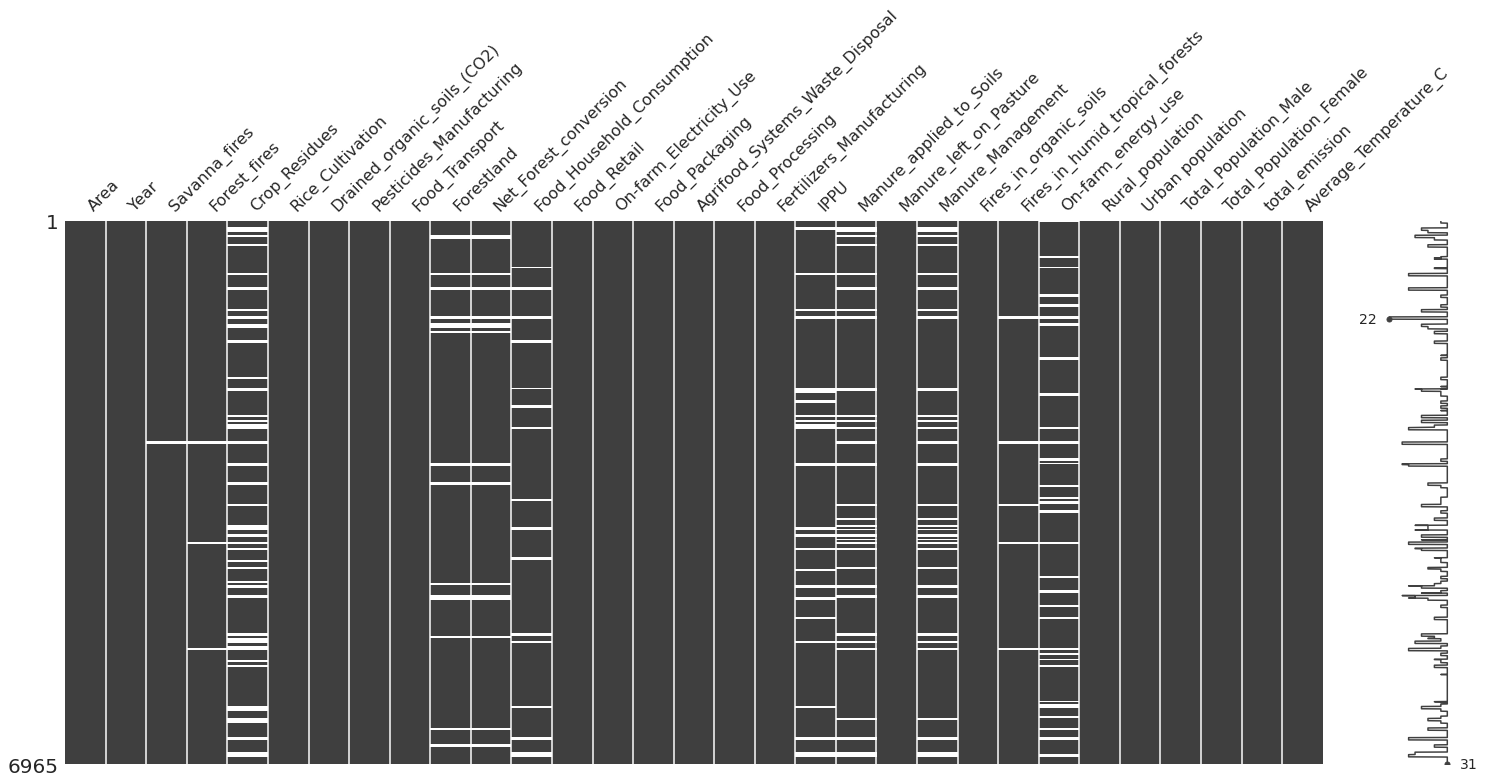

In [568]:
msno.matrix(df)

There are many missing values present in the dataset.

In [569]:
def missingValue(col):
    missing = df[df[col].isna() == True]
    if missing['Area'].any() == False:
        pass
    else:
        print('Column name:',col,'\n', 'Countries :', missing['Area'].unique())
        print('-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#')

for col in df.columns:
    missingValue(col)

Column name: Savanna_fires 
 Countries : ['Holy See']
-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#
Column name: Forest_fires 
 Countries : ['Holy See' 'Monaco' 'San Marino']
-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#
Column name: Crop_Residues 
 Countries : ['American Samoa' 'Andorra' 'Anguilla' 'Aruba' 'Bahrain' 'Bermuda'
 'British Virgin Islands' 'Cayman Islands' 'Channel Islands'
 'China, Hong Kong SAR' 'China, Macao SAR' 'Cook Islands'
 'Equatorial Guinea' 'Falkland Islands (Malvinas)' 'Gibraltar' 'Greenland'
 'Guadeloupe' 'Guam' 'Holy See' 'Isle of Man' 'Kiribati' 'Liechtenstein'
 'Marshall Islands' 'Martinique' 'Mayotte' 'Monaco' 'Montserrat' 'Nauru'
 'Netherlands Antilles (former)' 'Niue' 'Northern Mariana Islands' 'Palau'
 'Palestine' 'Saint Helena, Ascension and Tristan da Cunha'
 'Saint Kitts and Nevis' 'Saint Lucia' 'Saint Pierre and Miquelon' 'Samoa'
 'San Marino' 'Seychelles' 'Singapore' 'Tokelau' 'Tonga'
 'Turks and Caicos Islands' 'Tuval

## EDA

<AxesSubplot:>

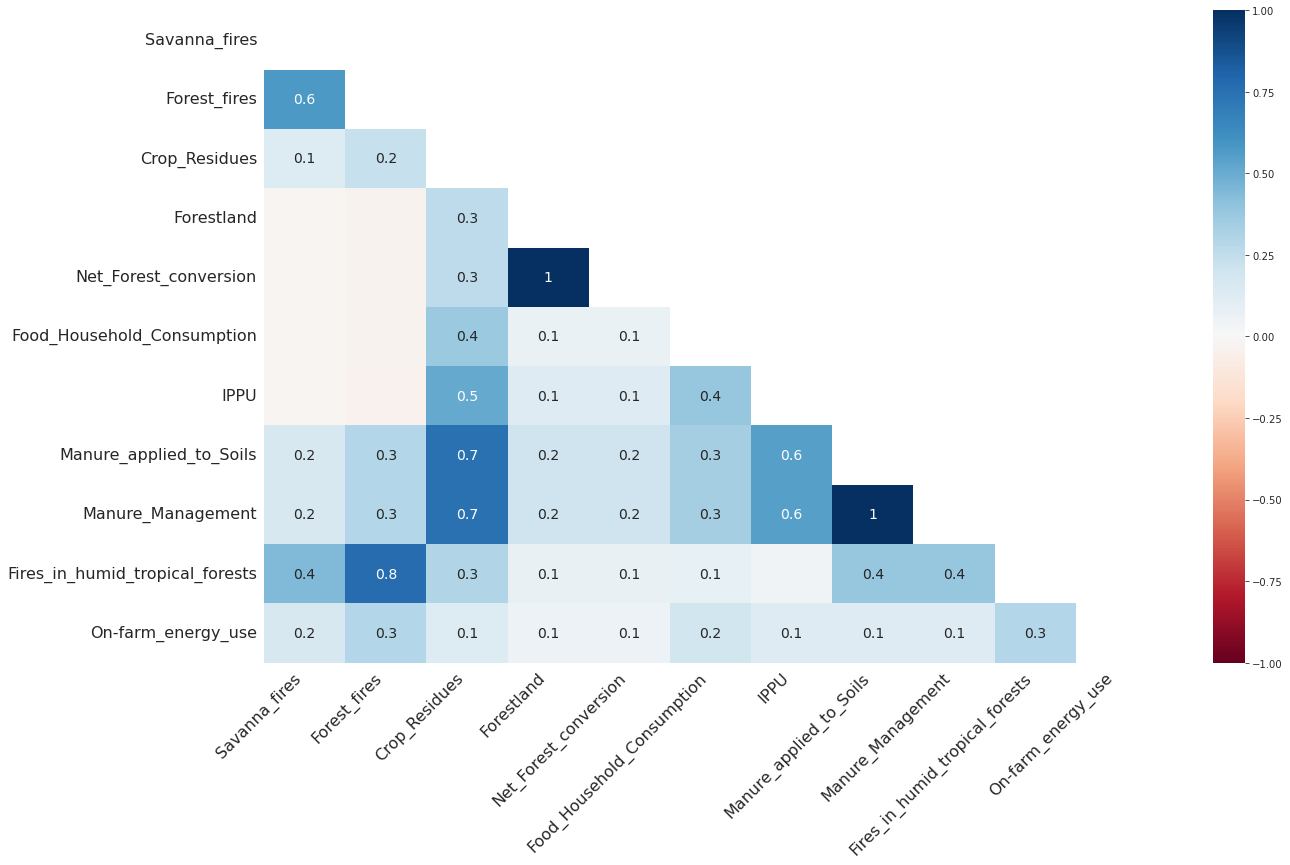

In [570]:
msno.heatmap(df)

In [571]:
# Period the dataset covers.
df['Year'].unique()

array([1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000,
       2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
       2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020])

In [572]:
num_of_countries = df['Area'].unique()
count = 0
for i in num_of_countries:
    count += 1
print('The number of Area that is considered in this dataset are: ', count)

The number of Area that is considered in this dataset are:  236


## Data Cleaning

The dataset has been preprocessed for analysis and forecasting but there are still some missing data.   
We look at them one by one and decide the best cleaning practice.


- There are 11 categories with missing data and 3 of them where the data can be set to zero with high confidence. These are the Savanna and Forest fires and Fires in humid tropical forests.
- We have to make the assumption that due to conservation efforts the Net Forest Conversion is close to zero in the countries where we have no data. These are mainly tropical islands, small islands, city states or mostly desert country (UAE).
- Hence assuming that the Forestland hasn't changed significantly as we set the Net Forest Conversion to zero.   

The rest of the dataset has missing values for most of the 31 years of period. It 

In [573]:
'''# Creating a copy of the original dataset
df2 = df.copy(deep = True)

# Filling values only in those columns where we have high confidence that these values are close to or zero
df2['Savanna_fires'].mask(df['Savanna_fires'].isna() == True, 0, inplace = True)
df2['Forest_fires'].mask(df['Forest_fires'].isna() == True, 0, inplace = True)
df2['Fires_in_humid_tropical_forests'].mask(df['Fires_in_humid_tropical_forests'].isna() == True, 0, inplace = True)
df2['Net_Forest_conversion'].mask(df['Net_Forest_conversion'].isna() == True, 0, inplace = True)


'''
# Filling all missing values with zeros in the lack of information
df.fillna(value = 0, inplace = True)

In [574]:
# Multiply the values by -1 where positive in the Forestland
df['Forestland'] = np.where(df['Forestland'] > 0, df['Forestland']*(-1), df['Forestland'])

In [575]:
# As the data has been changed we need to adjust the total emission by subtracting the values that we changed to minus from the total emission to keep the data integrity.
df['total_emission'] = np.where(round(df['total_emission'] - integrity_check, 10) > 0, (df['total_emission']- round(df['total_emission'] - integrity_check, 10)), df['total_emission'])

In [576]:
# Check the integrity of our data - the sum of the numerical values of each industry in each row shluld be equal to the total emission.
integrity_check = df.iloc[:,2:25].sum(axis = 1)
equ = df['total_emission'] - integrity_check

equ = round(equ, 10)
equ = pd.DataFrame(equ)
diff = equ[equ[0] > 0]
diff


0
1129  1.000000e-10
3792  1.000000e-10

In [577]:
integrity_rural_urban = df.iloc[:,26:27].sum(axis = 1)
integrity_male_female = df.iloc[:,28:29].sum(axis = 1)
pop_equ = integrity_rural_urban - integrity_male_female
pop_equ = pd.DataFrame(pop_equ)
pop = pd.DataFrame(np.where(pop_equ[0] == 0, True, False))
pop.value_counts()

False    6965
dtype: int64

It seems that the rural and urban population sum doesn't match with the sum of the total female and male population. Hence we have to choose which columns to keep to have a consistent data.   

In [578]:
df.drop(['Rural_population','Urban population'], inplace = True, axis = 1)

<AxesSubplot:>

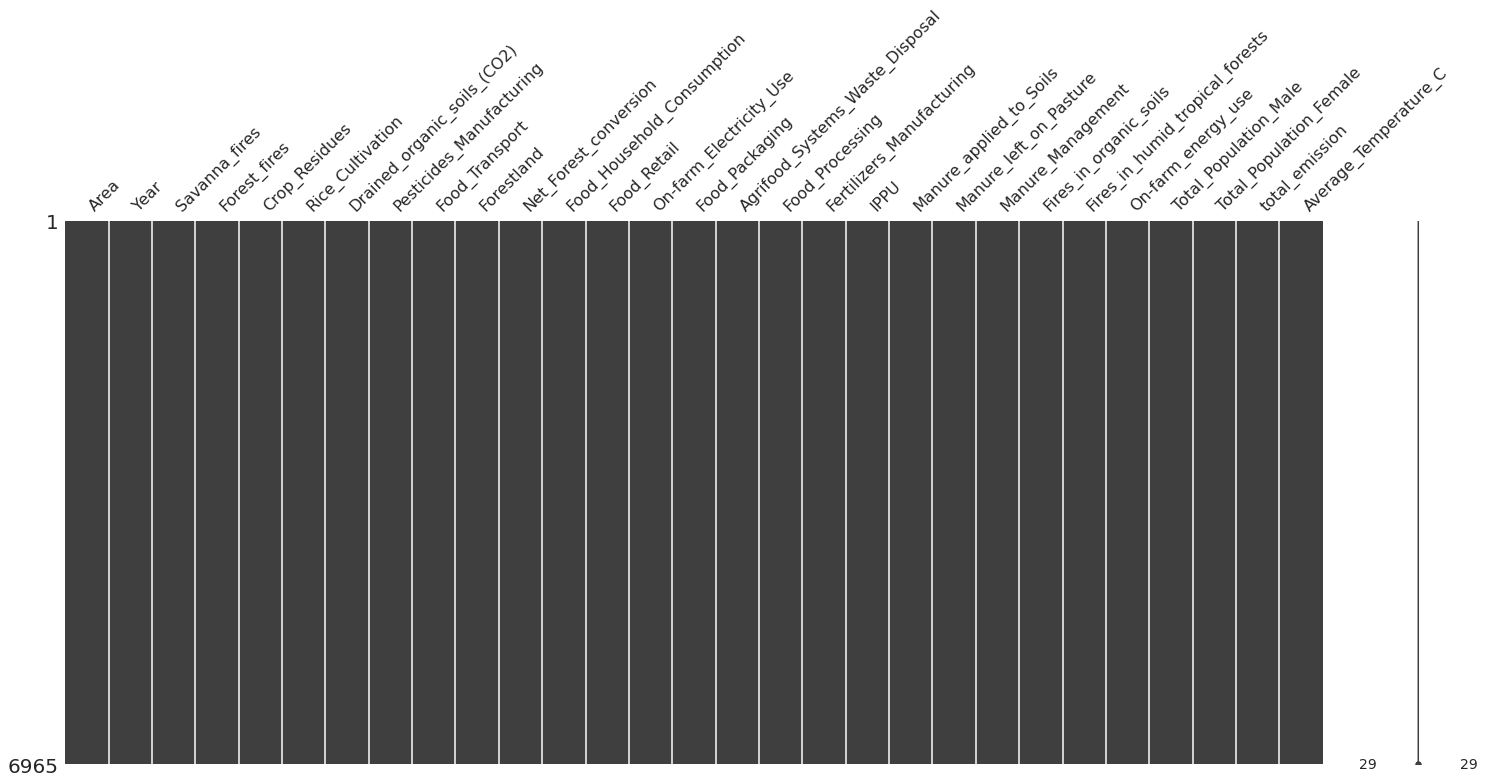

In [579]:
msno.matrix(df)

Replacing some of the countries name with a shorter name.

In [580]:
df = df.replace(to_replace = ["Bolivia (Plurinational State of)",
                         "Democratic People's Republic of Korea",
                         "Democratic Republic of the Congo",
                         "Ethiopia PDR",
                         "Falkland Islands (Malvinas)",
                         "Iran (Islamic Republic of)",
                         "Lao People's Democratic Republic",
                         "Micronesia (Federated States of)",
                         "Netherlands (Kingdom of the)",
                         "Netherlands Antilles (former)",
                         "Republic of Moldova",
                         "Russian Federation",
                         "Sudan (former)",
                         "Syrian Arab Republic",
                         "United Republic of Tanzania",
                         "United States Virgin Islands",
                         "Venezuela (Bolivarian Republic of)",
                         "Viet Nam",
                         "Republic of Korea",
                         "Czechia",
                         "China, Taiwan Province of",
                         "Belgium-Luxembourg"],
            value = ['Bolivia',
                     'North Korea',
                     'Congo',
                     'Ethiopia',
                     'Falkland Islands',
                     'Iran',
                     'Laos',
                     'Micronesia',
                     'Netherlands',
                     'Netherlands Antilles',
                     'Moldova',
                     'Russia',
                     'Sudan',
                     'Syria',
                     'Tanzania',
                     'US Virgin Islands',
                     'Venezuela',
                     'Vietnam',
                     'South Korea',
                     'Czech Republic',
                     'Taiwan',
                     'Luxembourg'])

## Feature Engineering

We add where the country is located by continent and region.

In [581]:
continents = json.load(open('continents.json','r'))
world_regions = json.load(open('world_regions.json','r'))

def assign_continent(area):
    for continent, country in continents.items():
        if area in country:
            return continent

df['Continents'] = df.loc[:,'Area'].apply(assign_continent)

def assign_region(area):
    for continent, country in world_regions.items():
        if area in country:
            return continent
df['World_regions'] = df.loc[:,'Area'].apply(assign_region)

Also adding an extra column to the dataset for the total population, calculated from the total male and female population for each year.

In [582]:
df['total_population'] = df.loc[:,'Total_Population_Male'] + df.loc[:,'Total_Population_Female']
#df['Emission_proportion'] = df.groupby('Year')['total_emission'].transform('sum')

We exclude Chine from the dataset as it's a duplicate. China here represents the mainland and the territorial parts like Macao, Hond Kong etc that included in the dataset separately.

In [583]:
df = df[df['Area'] != 'China']

## EDA - Data Visualization

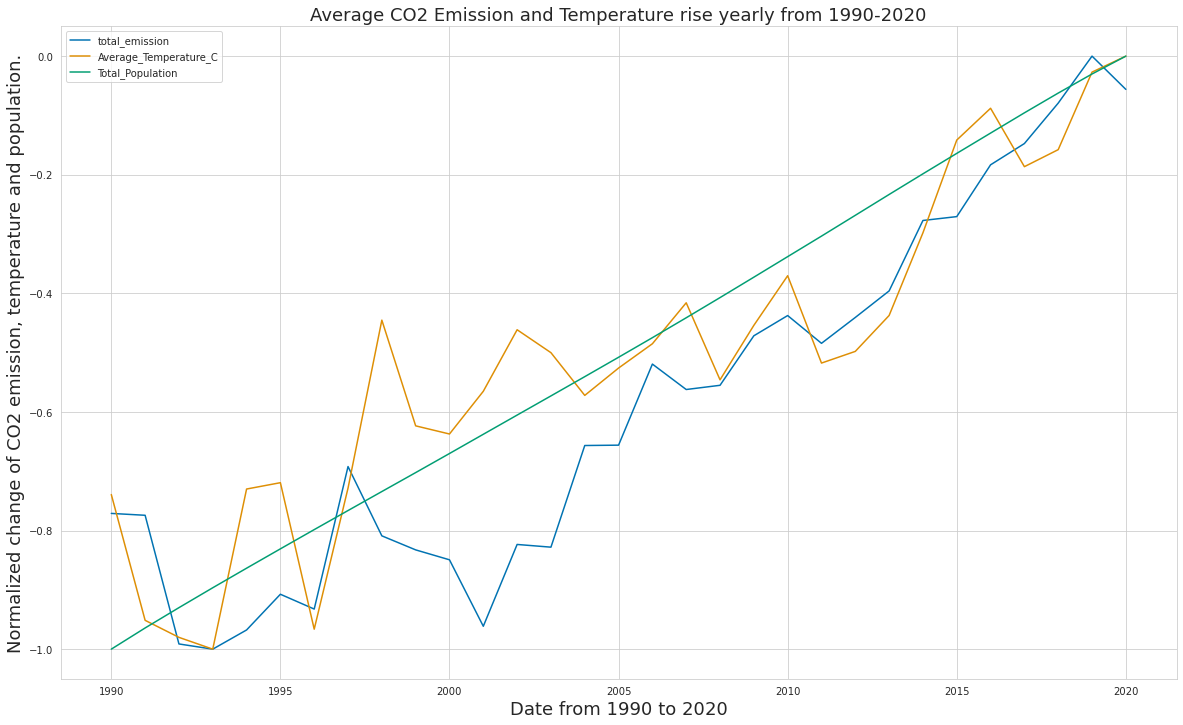

In [584]:
def normalize(df):
    n = (df-df.max())/(df.max()-df.min())
    return n

df_year = df.groupby('Year')['total_emission','Average_Temperature_C'].mean()
df_pop = df.groupby('Year')['total_population'].sum()  #['Total_Population_Male','Total_Population_Female'].sum()
df_year['Total_Population'] = df_pop
df_year_norm = normalize(df_year)

df_year_norm.plot(figsize=(20, 12))
plt.title('Average CO2 Emission and Temperature rise yearly from 1990-2020', fontsize = 18)
plt.xlabel('Date from 1990 to 2020', fontsize = 18)
plt.ylabel('Normalized change of CO2 emission, temperature and population.', fontsize = 18)
plt.show()

From the graph above it can be seen that there is a direct correlation between the CO2 emission with temperature rise and the population growth.   
These emissions only about 1/5th of the total CO2 emission wordwide but the direct proportionality and upward trend can be seen from this dataset as well.

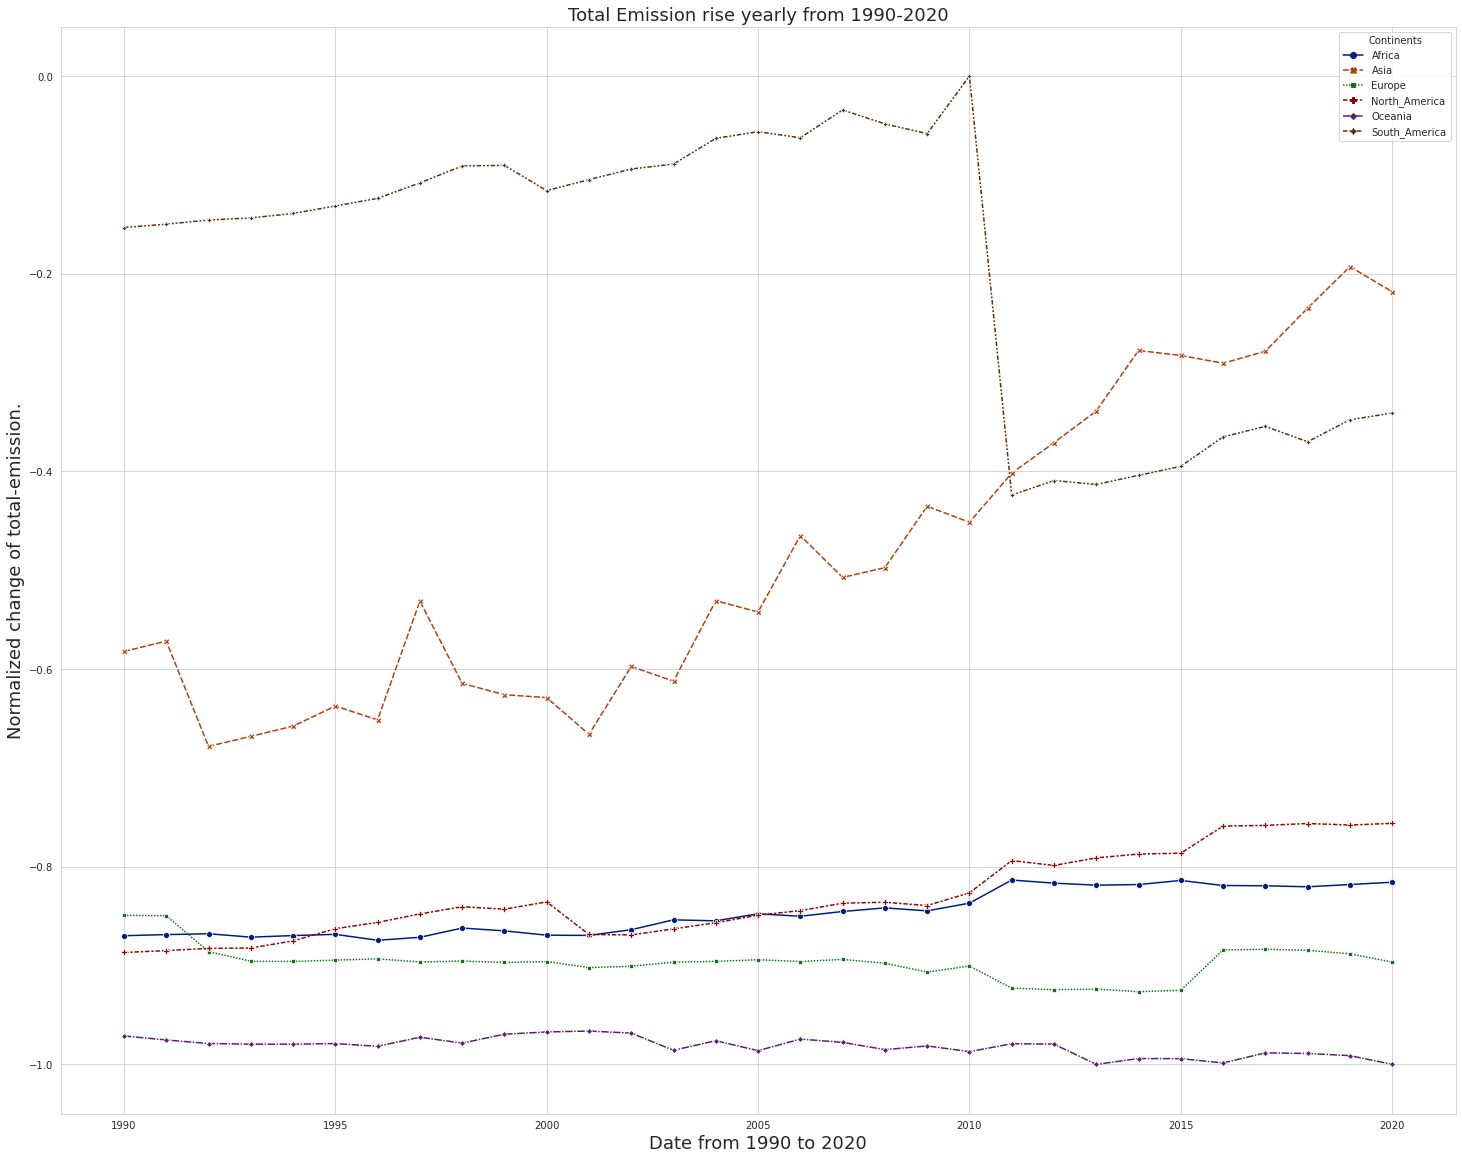

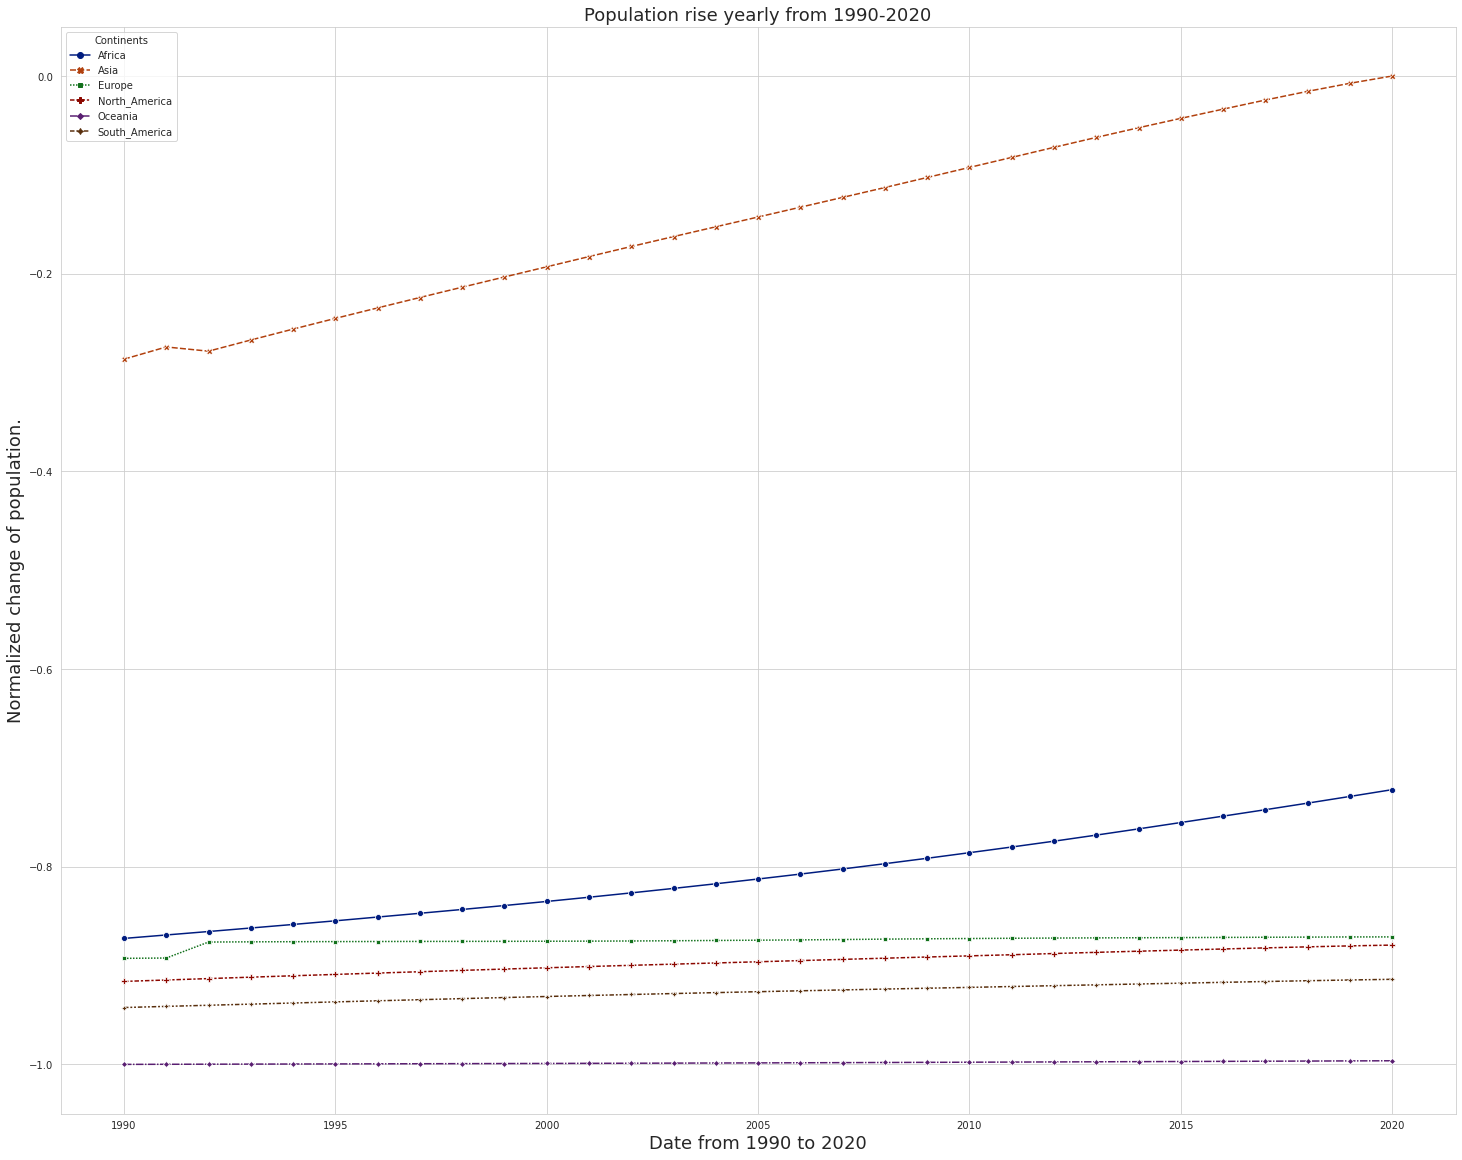

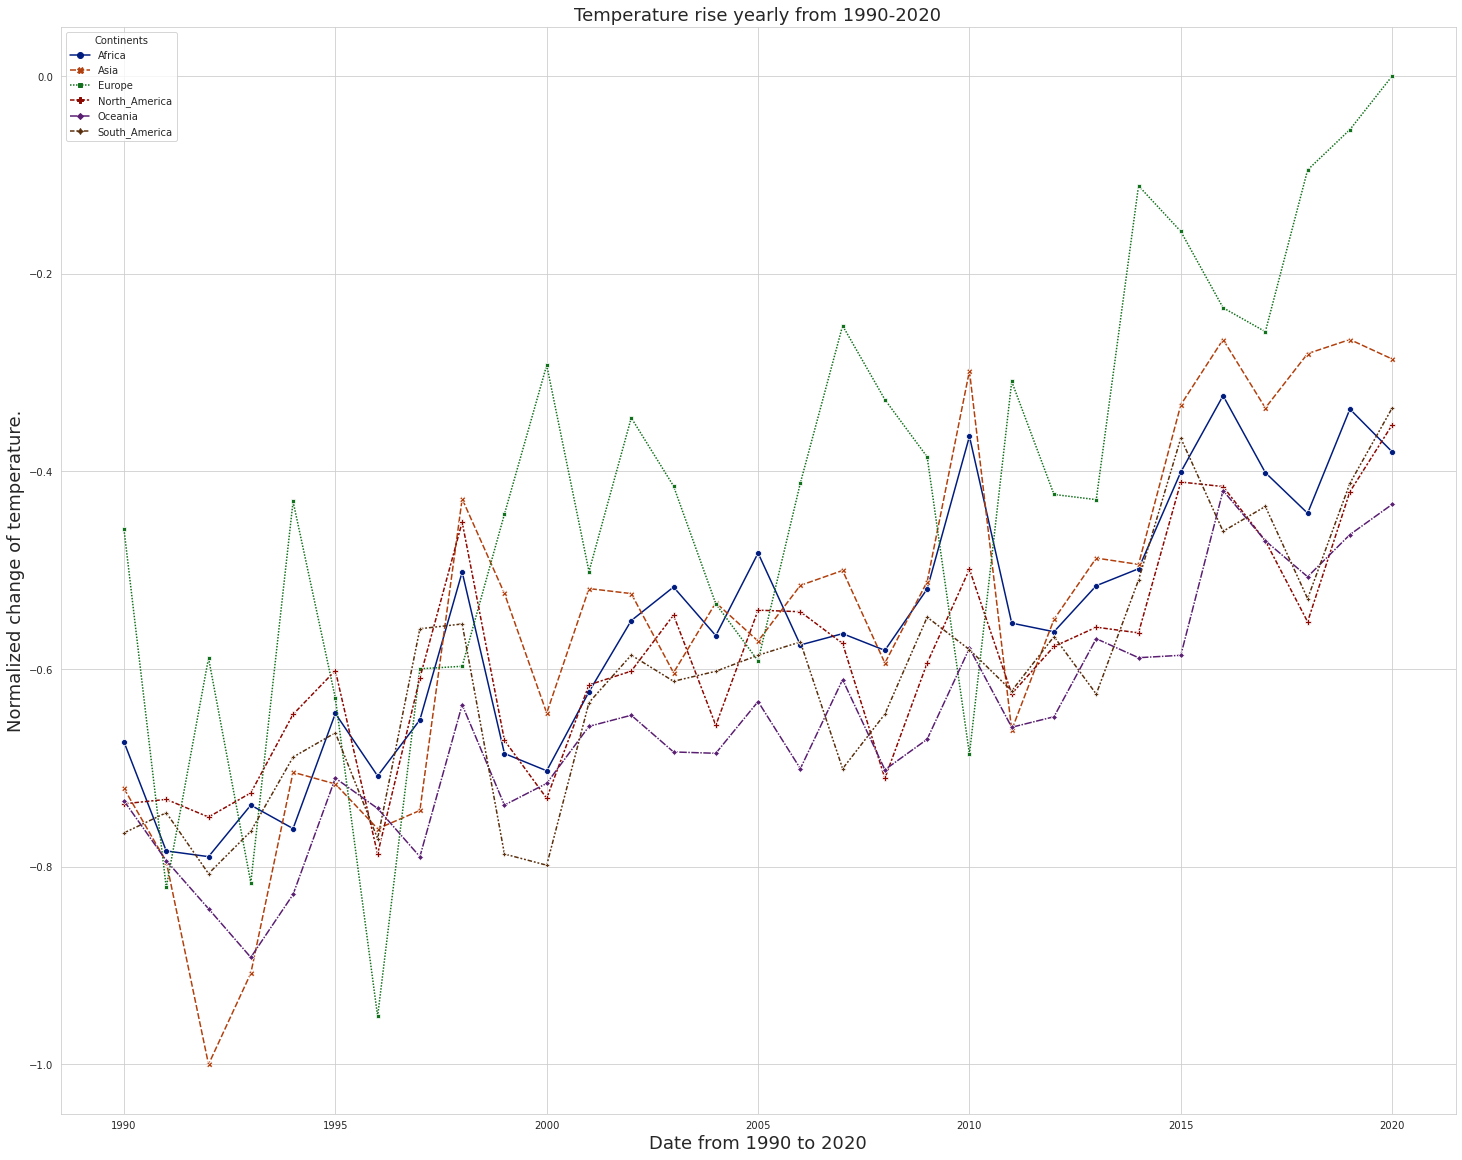

In [683]:
data_mean_tmp_emi = df.groupby(['Year','Continents'])[('total_emission','Average_Temperature_C')].agg('mean').reset_index()
data_sum_pop = df.groupby(['Year','Continents'])[('total_population')].agg('sum').reset_index()
data_joined = pd.merge(data_mean_tmp_emi, data_sum_pop,  how='left', left_on=['Year','Continents'], right_on = ['Year','Continents'])
data_joined2 = normalize(data_joined[['total_emission','Average_Temperature_C','total_population']])
data_joined2 = pd.concat((data_joined[['Year','Continents']], data_joined2[['total_emission','Average_Temperature_C','total_population']]), axis = 1)

sns.lineplot(data = data_joined2, x = 'Year', y = 'total_emission', hue = 'Continents', palette = 'dark', style = 'Continents', markers = True)
plt.title('Total Emission rise yearly from 1990-2020', fontsize = 18)
plt.xlabel('Date from 1990 to 2020', fontsize = 18)
plt.ylabel('Normalized change of total-emission.', fontsize = 18)
plt.show()

sns.lineplot(data = data_joined2, x = 'Year', y = 'total_population', hue = 'Continents', palette = 'dark', style = 'Continents', markers = True)
plt.title('Population rise yearly from 1990-2020', fontsize = 18)
plt.xlabel('Date from 1990 to 2020', fontsize = 18)
plt.ylabel('Normalized change of population.', fontsize = 18)
plt.show()

sns.lineplot(data = data_joined2, x = 'Year', y = 'Average_Temperature_C', hue = 'Continents', palette = 'dark', style = 'Continents', markers = True)
plt.title('Temperature rise yearly from 1990-2020', fontsize = 18)
plt.xlabel('Date from 1990 to 2020', fontsize = 18)
plt.ylabel('Normalized change of temperature.', fontsize = 18)
plt.show()

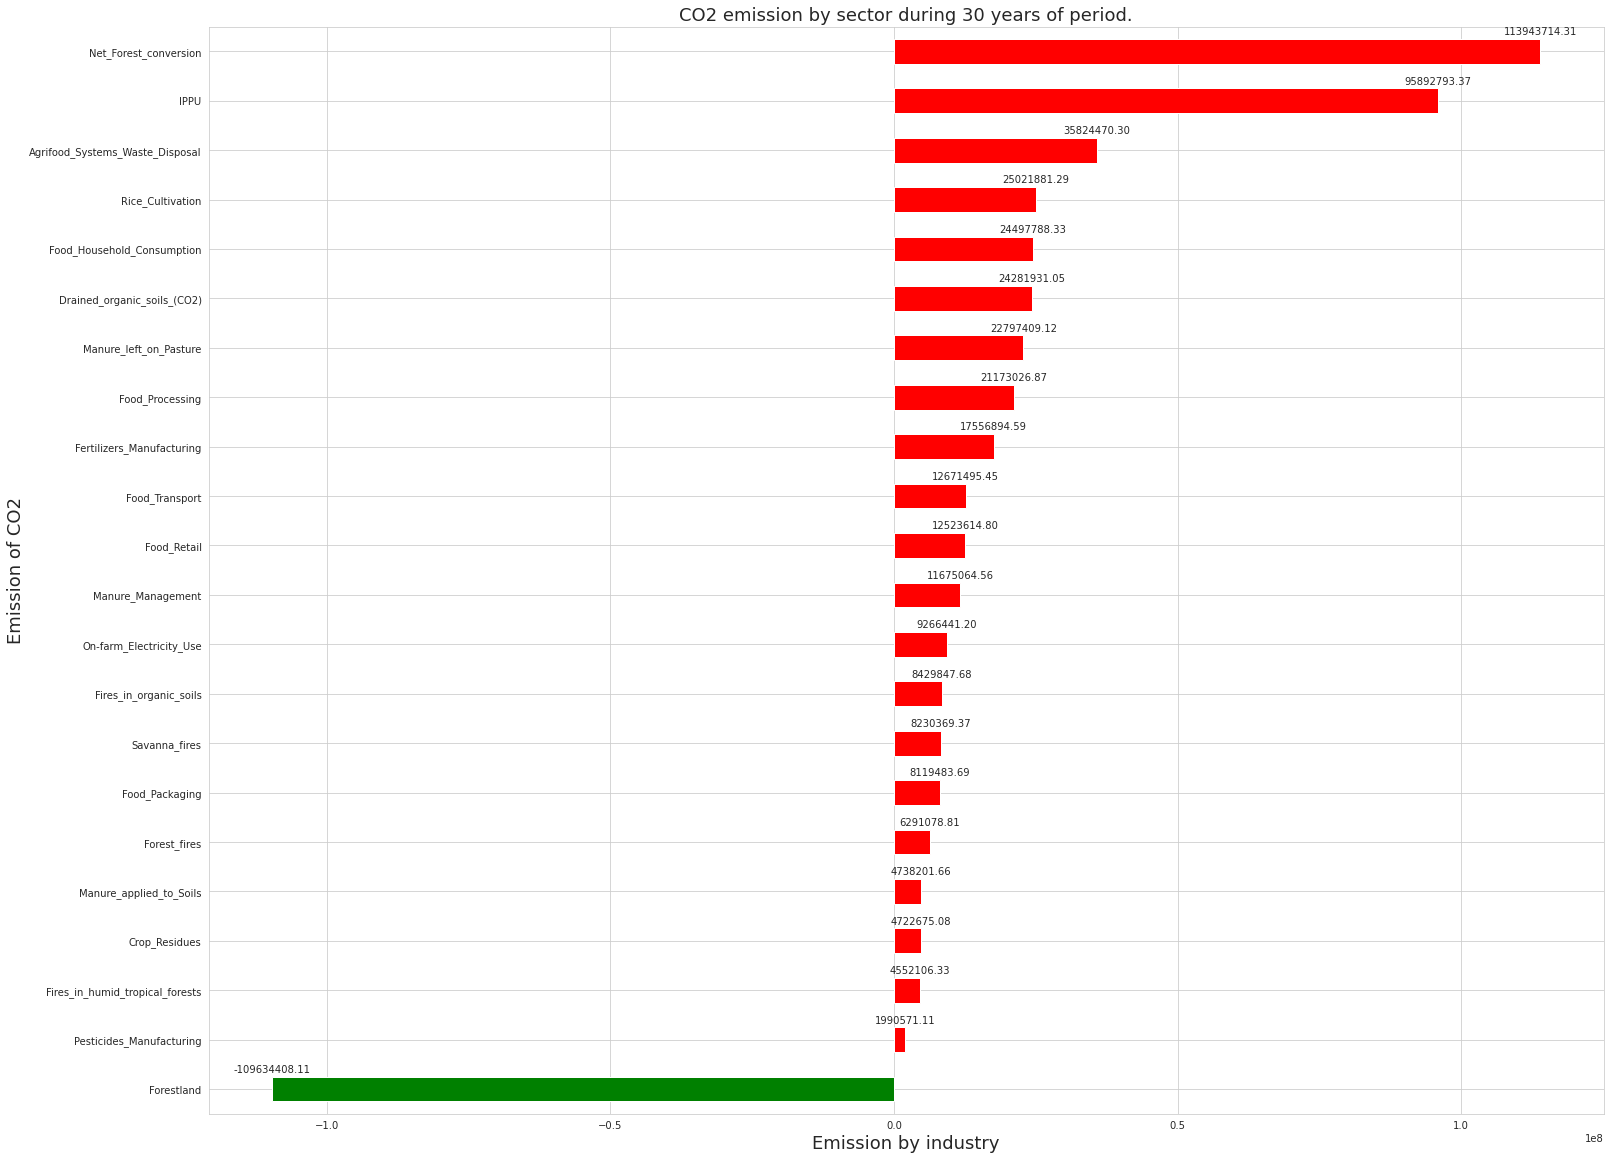

In [586]:

df_emitter = df.iloc[:,1:24].groupby('Year').sum()
sns.set_style('whitegrid')
df_emitter_tot = df_emitter.sum(axis = 0).sort_values()

colors = ['green' if (x < 0) else 'red' for x in df_emitter_tot]
g = df_emitter_tot.plot(kind = 'barh', 
                        figsize = (25, 20), 
                        color = colors, 
                        rot = 0) 
plt.title('CO2 emission by sector during 30 years of period.', fontsize = 18)
plt.xlabel('Emission by industry', fontsize = 18)
plt.ylabel('Emission of CO2', fontsize = 18)

for p in g.patches:
    width = p.get_width()
    plt.text(p.get_width(), p.get_y()+ 1.3* p.get_height(),
             '{:1.2f}'.format(width),
             ha='center', va='center')
plt.show()

If we break down the emissions by sector for the whole dataset by summing up the emissions the total emissions over the 31 years period and plotting by the individual sources    
it can be seen that the only negative emission is coming from the Forestland as we would expect.     

The most polluting among the agricultural sources is coming from the Net Forest Conversion followed by emissions from industrial processes and product use.    
These were most significant CO2 emitters between 1990 and 2020.

In [587]:
df_totalemi = df.groupby('Area')['total_emission'].sum()
df_totalemi = pd.DataFrame(df_totalemi).sort_values('total_emission', ascending = False)
#df_totalemi = df_totalemi.sort_values('total_emission', ascending = False)
df_top10 = df_totalemi.head(10).reset_index()
df_top10['Proportion_(%)'] = (df_top10['total_emission'] / df_top10['total_emission'].sum() )* 100
df_top10

Area  total_emission  Proportion_(%)
0           China, mainland    5.662423e+07       27.300614
1                    Brazil    3.659621e+07       17.644371
2                 Indonesia    2.821637e+07       13.604145
3  United States of America    2.319088e+07       11.181175
4                     India    1.972033e+07        9.507892
5                     Congo    1.706524e+07        8.227776
6                     Japan    6.923093e+06        3.337877
7                    Mexico    6.697904e+06        3.229305
8                   Germany    6.229363e+06        3.003404
9                    Canada    6.146473e+06        2.963440

The top 10 countries that contributed to most of the emissions. China is the leading emitter followed by Brazil where from China alone, about 10% more CO2 emission is coming than from the second most polluting country. 

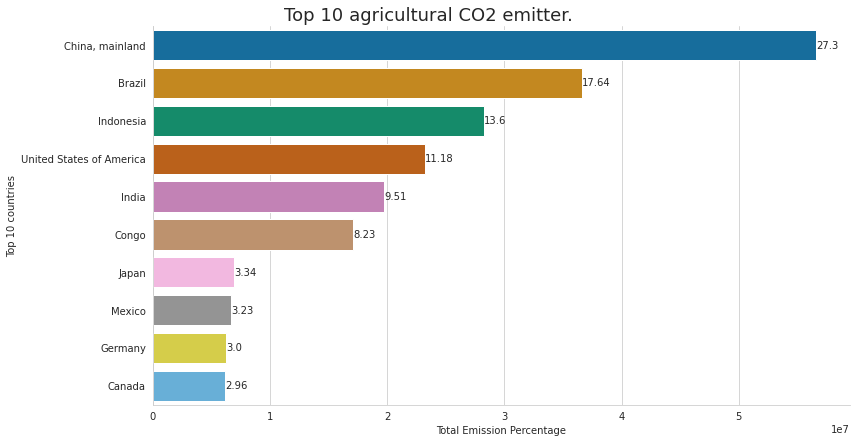

In [588]:
g = sns.catplot(x = 'total_emission',
            y = 'Area',
            data = df_top10,
            kind = 'bar',
            ci = None,
            height = 6,
            aspect = 2)
g.fig.suptitle('Top 10 agricultural CO2 emitter.', y = 1.02, fontsize = 18)
g.set(xlabel = 'Total Emission Percentage',
      ylabel = 'Top 10 countries')
ax = g.facet_axis(0, 0)
for c in ax.containers:
    labels = [f'{(v.get_height() / 1000):.1f}K' for v in c]
    ax.bar_label(c, labels=round(df_top10['Proportion_(%)'], 2), label_type='edge')
plt.show()

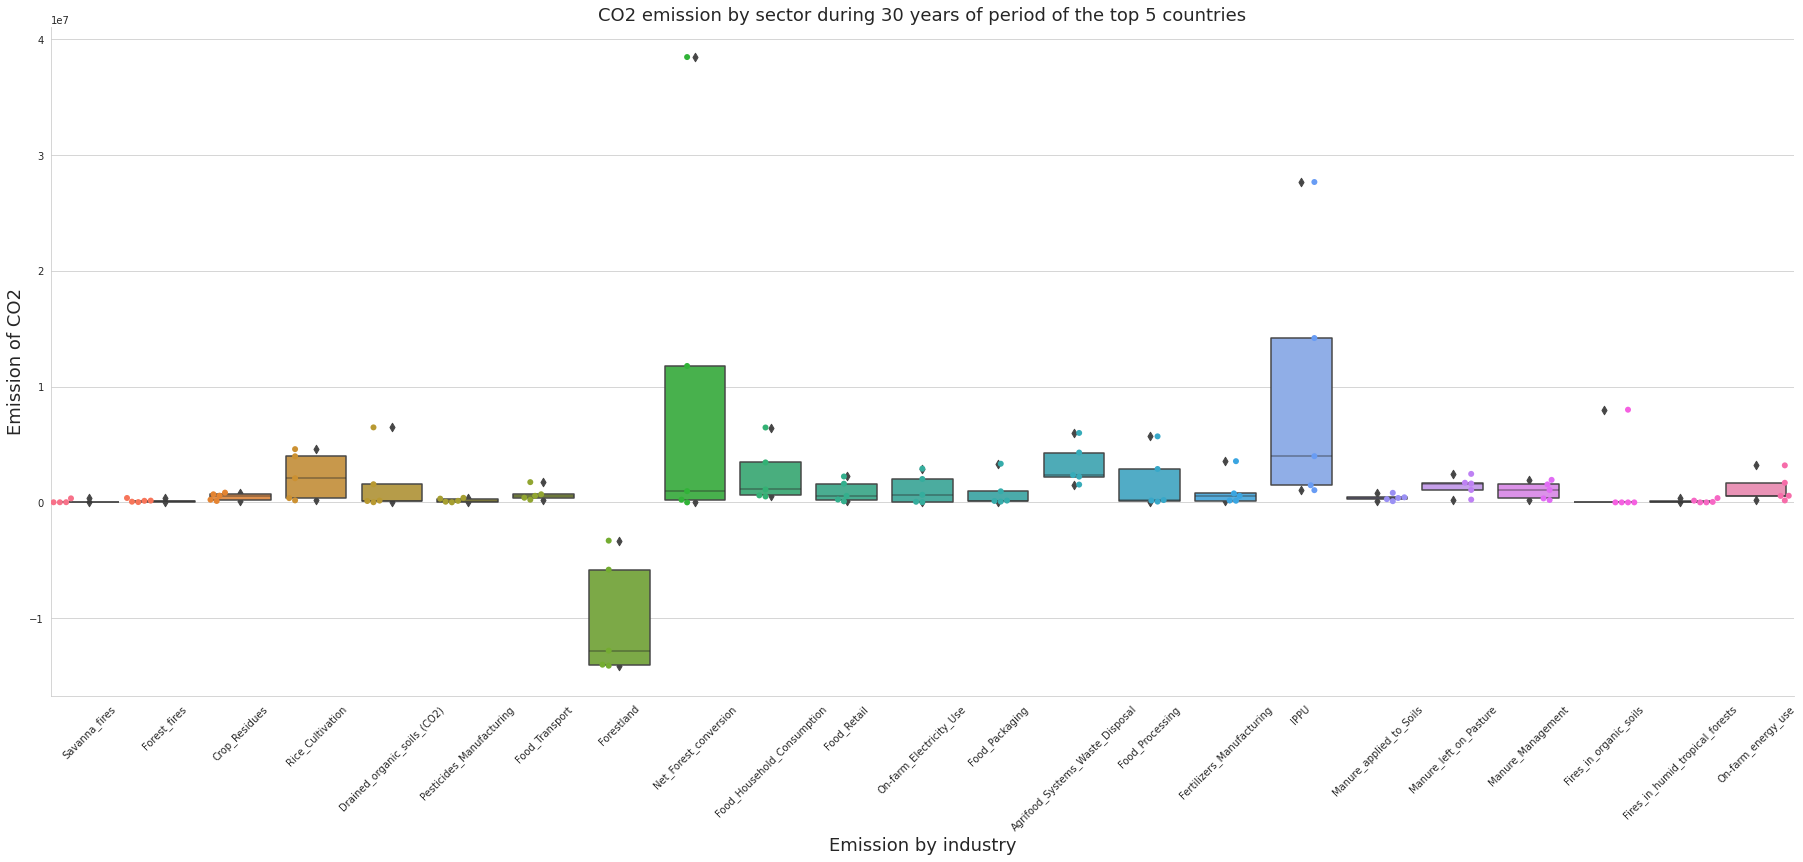

In [589]:
top5 = ['China, mainland','Brazil','Indonesia','United States of America', 'India']
df_top_bool = df['Area'].isin(top5)
df_top5 = df[df_top_bool]

df_top5_grp = df_top5.groupby('Area')[['Savanna_fires','Forest_fires', 'Crop_Residues',
                                       'Rice_Cultivation', 'Drained_organic_soils_(CO2)',  'Pesticides_Manufacturing',
                                       'Food_Transport', 'Forestland', 'Net_Forest_conversion',
                                       'Food_Household_Consumption', 'Food_Retail', 'On-farm_Electricity_Use',
                                       'Food_Packaging', 'Agrifood_Systems_Waste_Disposal', 'Food_Processing',
                                       'Fertilizers_Manufacturing', 'IPPU', 'Manure_applied_to_Soils',
                                       'Manure_left_on_Pasture', 'Manure_Management', 'Fires_in_organic_soils',
                                       'Fires_in_humid_tropical_forests', 'On-farm_energy_use']].sum()

df_top5_grp.reset_index()
sns.catplot(data = df_top5_grp,
            kind = 'boxen',
            height=10, 
            aspect=2.5,
            errorbar = None)
sns.swarmplot(data = df_top5_grp, size = 6, dodge = True)
plt.title('CO2 emission by sector during 30 years of period of the top 5 countries', fontsize = 18)
plt.xlabel('Emission by industry', fontsize = 18)
plt.ylabel('Emission of CO2', fontsize = 18)
plt.xticks(rotation = 45)
plt.show()

In [590]:
df_bottom10 = df_totalemi.tail(10).reset_index()
df_bottom10['Proportion_(%)'] = (df_bottom10['total_emission'] / df_bottom10['total_emission'].sum() )* 100
df_bottom10

Area  total_emission  Proportion_(%)
0                Georgia   -4.730578e+04        0.766362
1                 Latvia   -5.110531e+04        0.827916
2  Serbia and Montenegro   -5.933866e+04        0.961297
3               Slovenia   -6.546388e+04        1.060527
4                Finland   -9.975058e+04        1.615978
5        Solomon Islands   -1.562589e+05        2.531424
6               Bulgaria   -3.108318e+05        5.035533
7                Romania   -4.778241e+05        7.740840
8                  Chile   -5.811333e+05        9.414469
9                 Russia   -4.323756e+06       70.045654

The bottom 10 countries that contributed the least to the emissions. The least polluting from the agricultural sector is Russia due the forest/land area coverage followed by Chile and Romania.

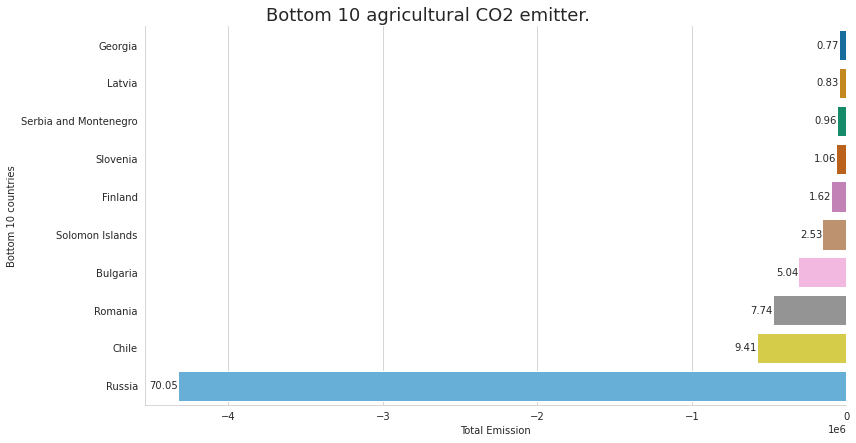

In [591]:
g = sns.catplot(x = 'total_emission',
            y = 'Area',
            data = df_bottom10,
            kind = 'bar',
            ci = None,
            height = 6,
            aspect = 2)
g.fig.suptitle('Bottom 10 agricultural CO2 emitter.', y = 1.02, fontsize = 18)
g.set(xlabel = 'Total Emission',
      ylabel = 'Bottom 10 countries')
ax = g.facet_axis(0, 0)
for c in ax.containers:
    labels = [f'{(v.get_height() / 1000):.1f}K' for v in c]
    ax.bar_label(c, labels=round(df_bottom10['Proportion_(%)'], 2), label_type='edge')
plt.show()

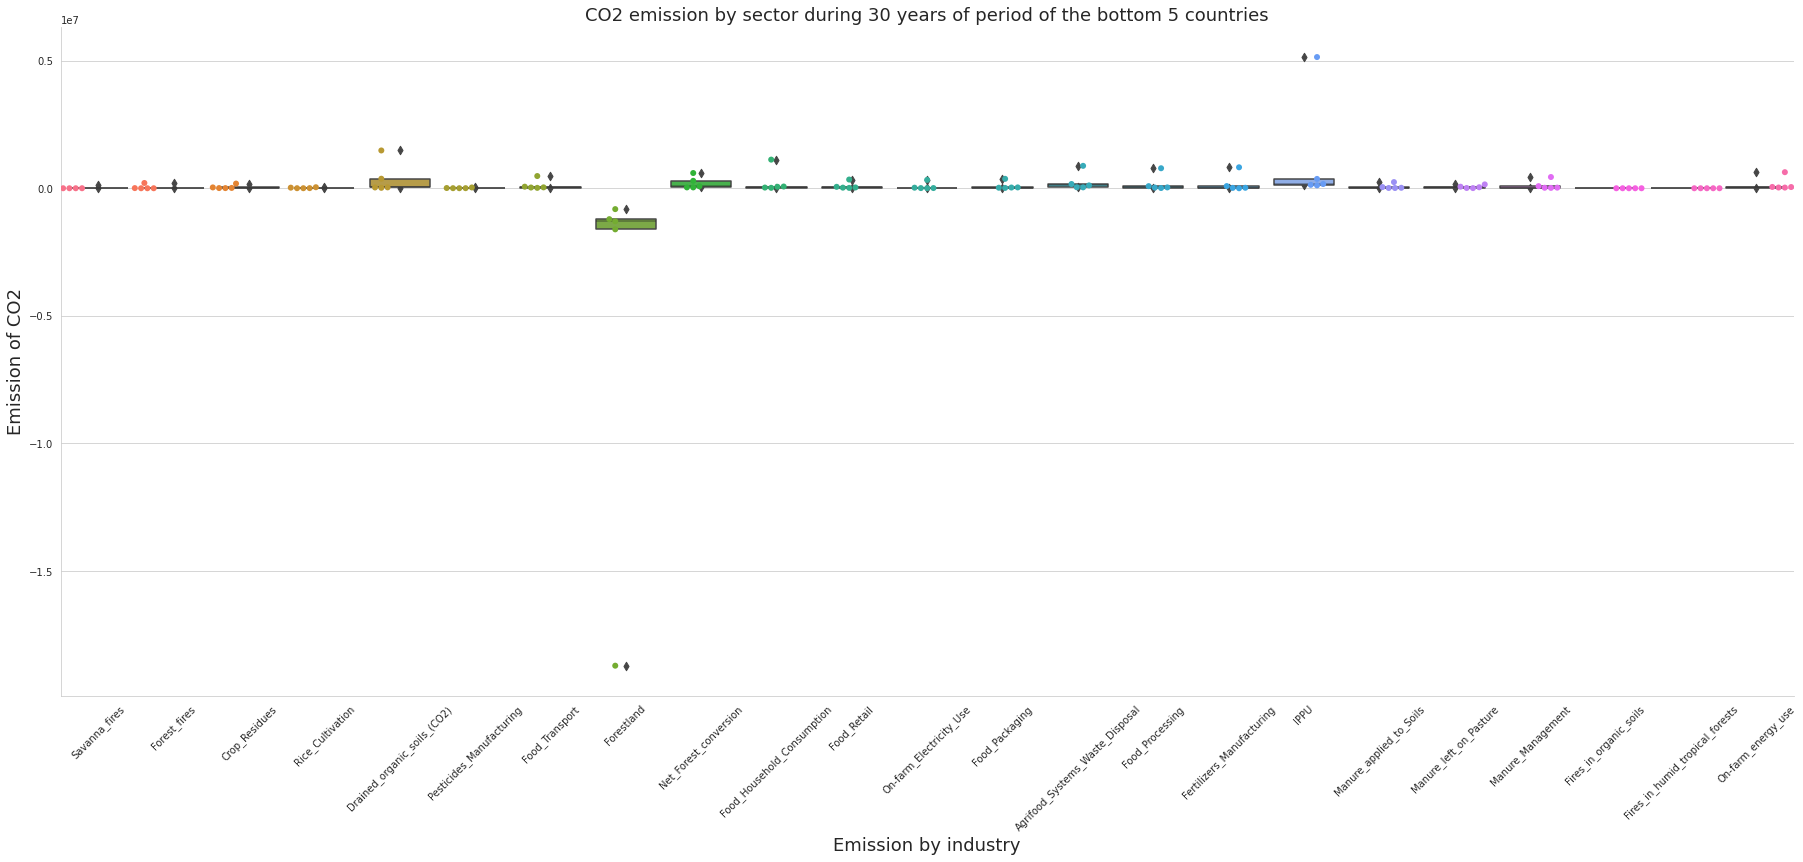

In [592]:
bottom5 = ['Russia','Chile','Romania','Bulgaria', 'Finland']
df_bottom_bool = df['Area'].isin(bottom5)
df_bottom5 = df[df_bottom_bool]

df_bottom5_grp = df_bottom5.groupby('Area')[['Savanna_fires','Forest_fires', 'Crop_Residues',
                                       'Rice_Cultivation', 'Drained_organic_soils_(CO2)',  'Pesticides_Manufacturing',
                                       'Food_Transport', 'Forestland', 'Net_Forest_conversion',
                                       'Food_Household_Consumption', 'Food_Retail', 'On-farm_Electricity_Use',
                                       'Food_Packaging', 'Agrifood_Systems_Waste_Disposal', 'Food_Processing',
                                       'Fertilizers_Manufacturing', 'IPPU', 'Manure_applied_to_Soils',
                                       'Manure_left_on_Pasture', 'Manure_Management', 'Fires_in_organic_soils',
                                       'Fires_in_humid_tropical_forests', 'On-farm_energy_use']].sum()

df_bottom5_grp.reset_index()
sns.catplot(data = df_bottom5_grp,
            kind = 'boxen',
            height=10, 
            aspect=2.5,
            errorbar = None)
sns.swarmplot(data = df_bottom5_grp, size = 6, dodge = True)
plt.title('CO2 emission by sector during 30 years of period of the bottom 5 countries', fontsize = 18)
plt.xlabel('Emission by industry', fontsize = 18)
plt.ylabel('Emission of CO2', fontsize = 18)
plt.xticks(rotation = 45)
plt.show()

Looking at the average temperature change due to carnon emission year by year in the different regions of the world. From the next three plot we can conclude that the most effected by the CO2 emission is Europe and the second one is Asia.

In [593]:
df_1990_1999 = df.query('Year >= 1990 and Year <= 1999')
df_2000_2009 = df.query('Year >= 2000 and Year <= 2009')
df_2010_2020 = df.query('Year >= 2010 and Year <= 2020')

def emissionBoxPlot(dataframe, title):
      sns.set_style('whitegrid')
      g = sns.catplot(x = 'Year',
                  y = 'Average_Temperature_C',
                  data = dataframe,
                  kind = 'box',
                  hue = 'Continents',
                  height=10, 
                  aspect=2.5
                  )
      g.fig.suptitle('Average temperature change by year from ' + title, fontsize = 18)
      g.set(xlabel = 'Year',
            ylabel = 'Average change of temperature.')
      plt.show()

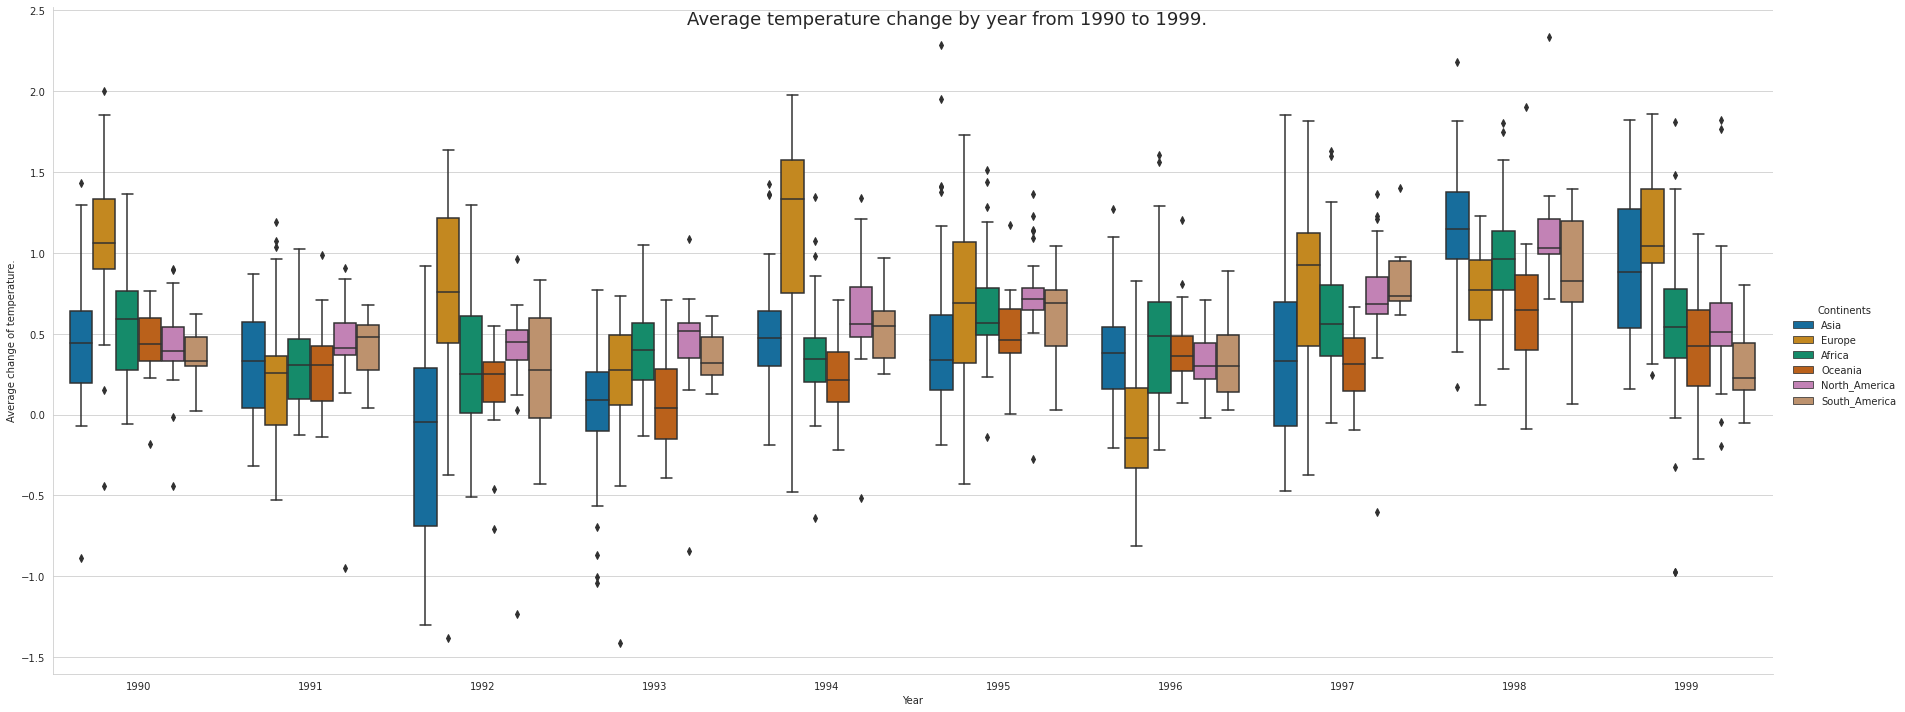

In [594]:
emissionBoxPlot(df_1990_1999, '1990 to 1999.')

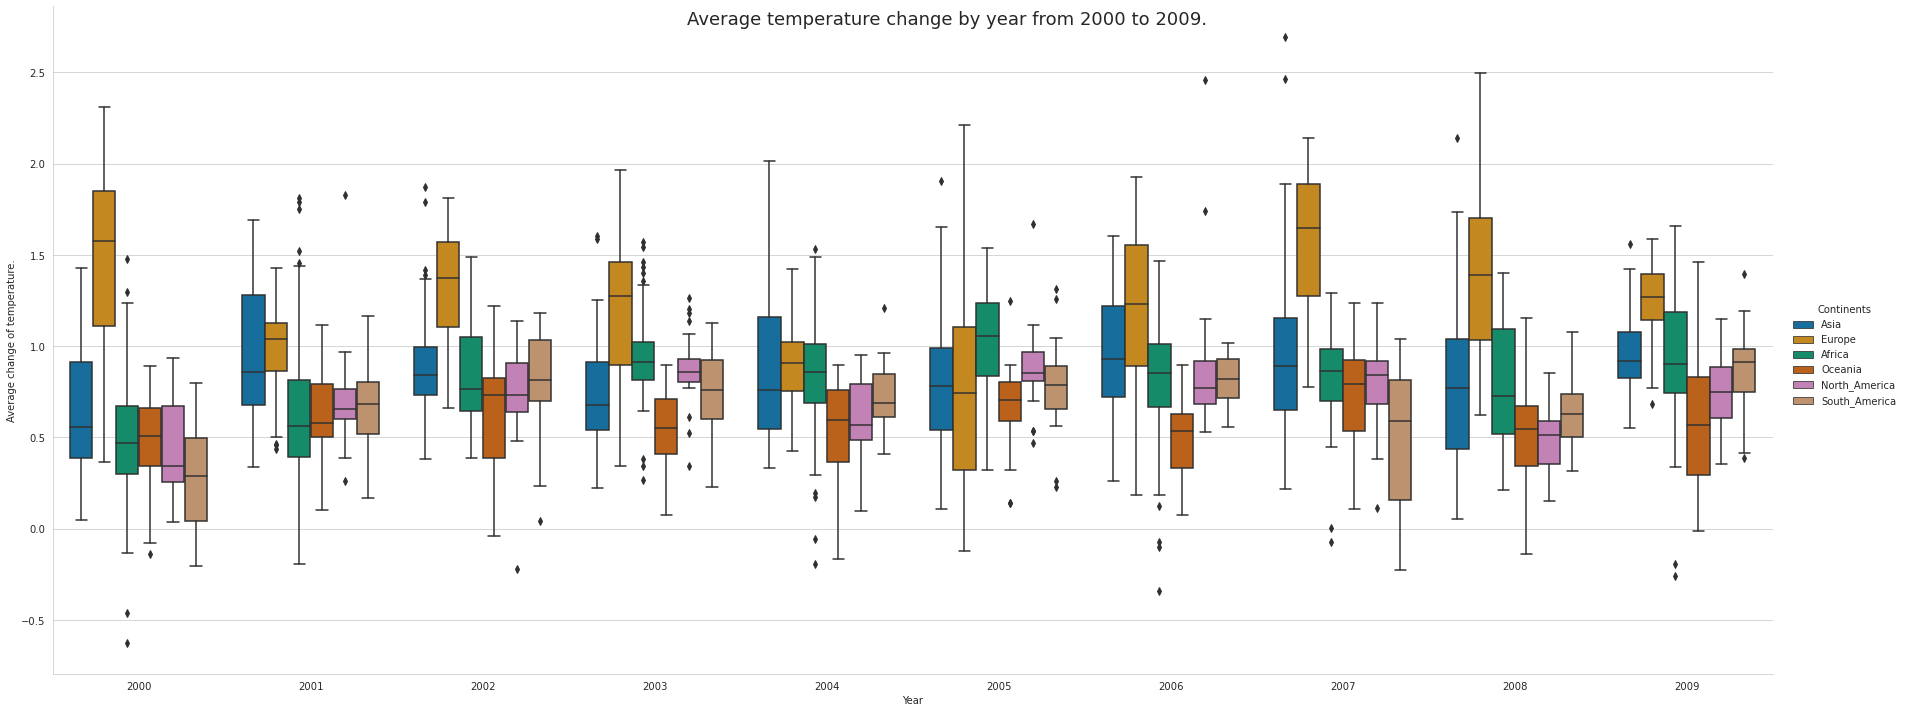

In [595]:
emissionBoxPlot(df_2000_2009, '2000 to 2009.')

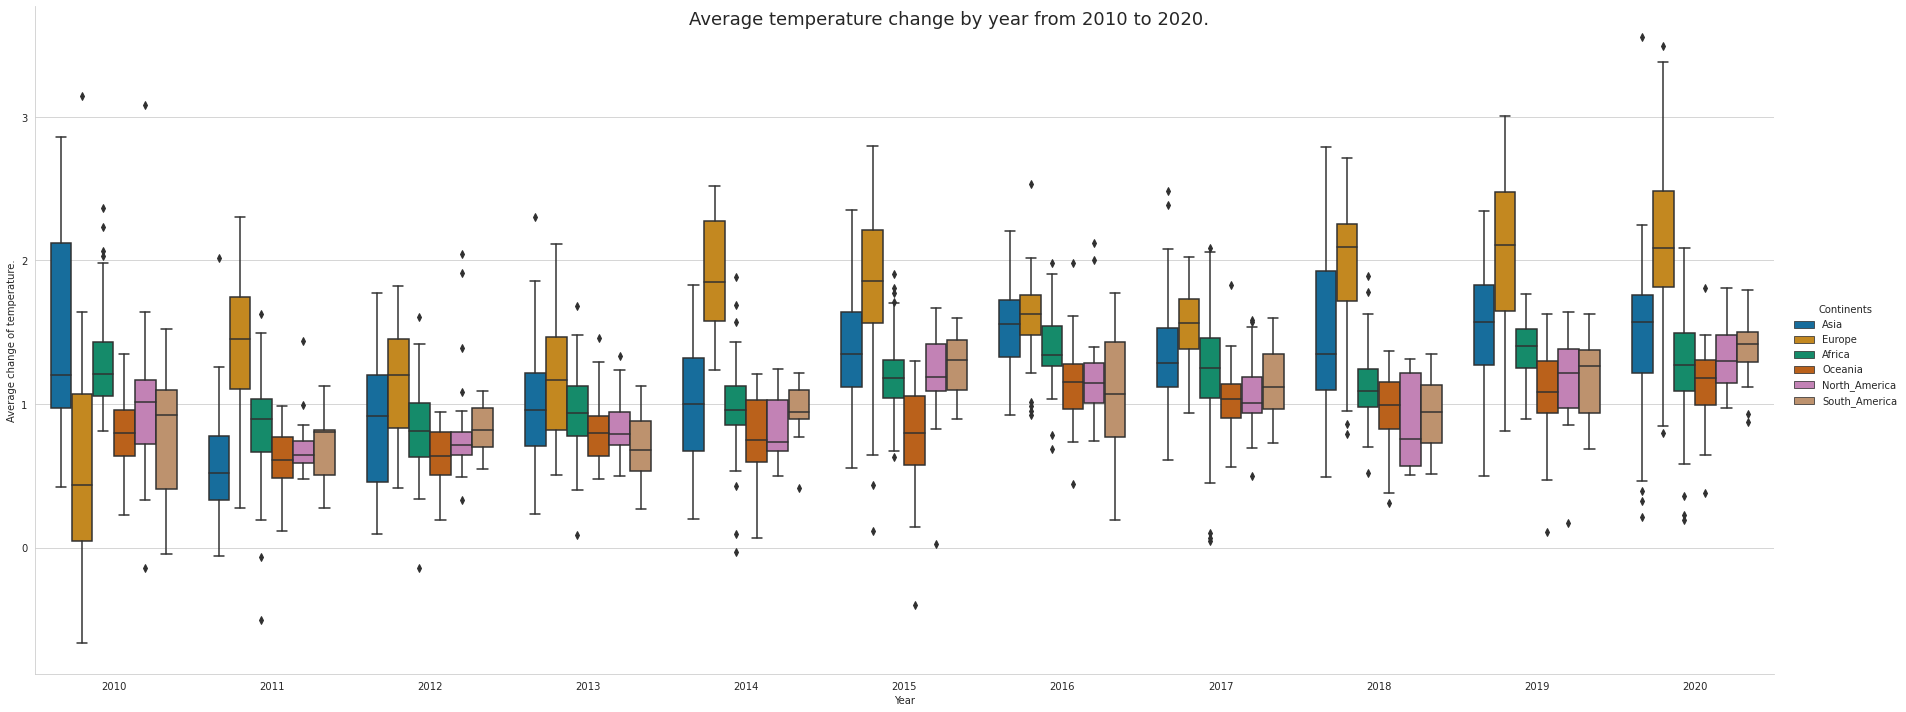

In [596]:
emissionBoxPlot(df_2010_2020, '2010 to 2020.')

Looking at the same graph from a different perspective reveals that most of the agricultural CO2 emission is coming from Asia.   
It can be seen from the plot that the population is also the largest in Asia but the average temperature change effects Europe the most followed by Asia.

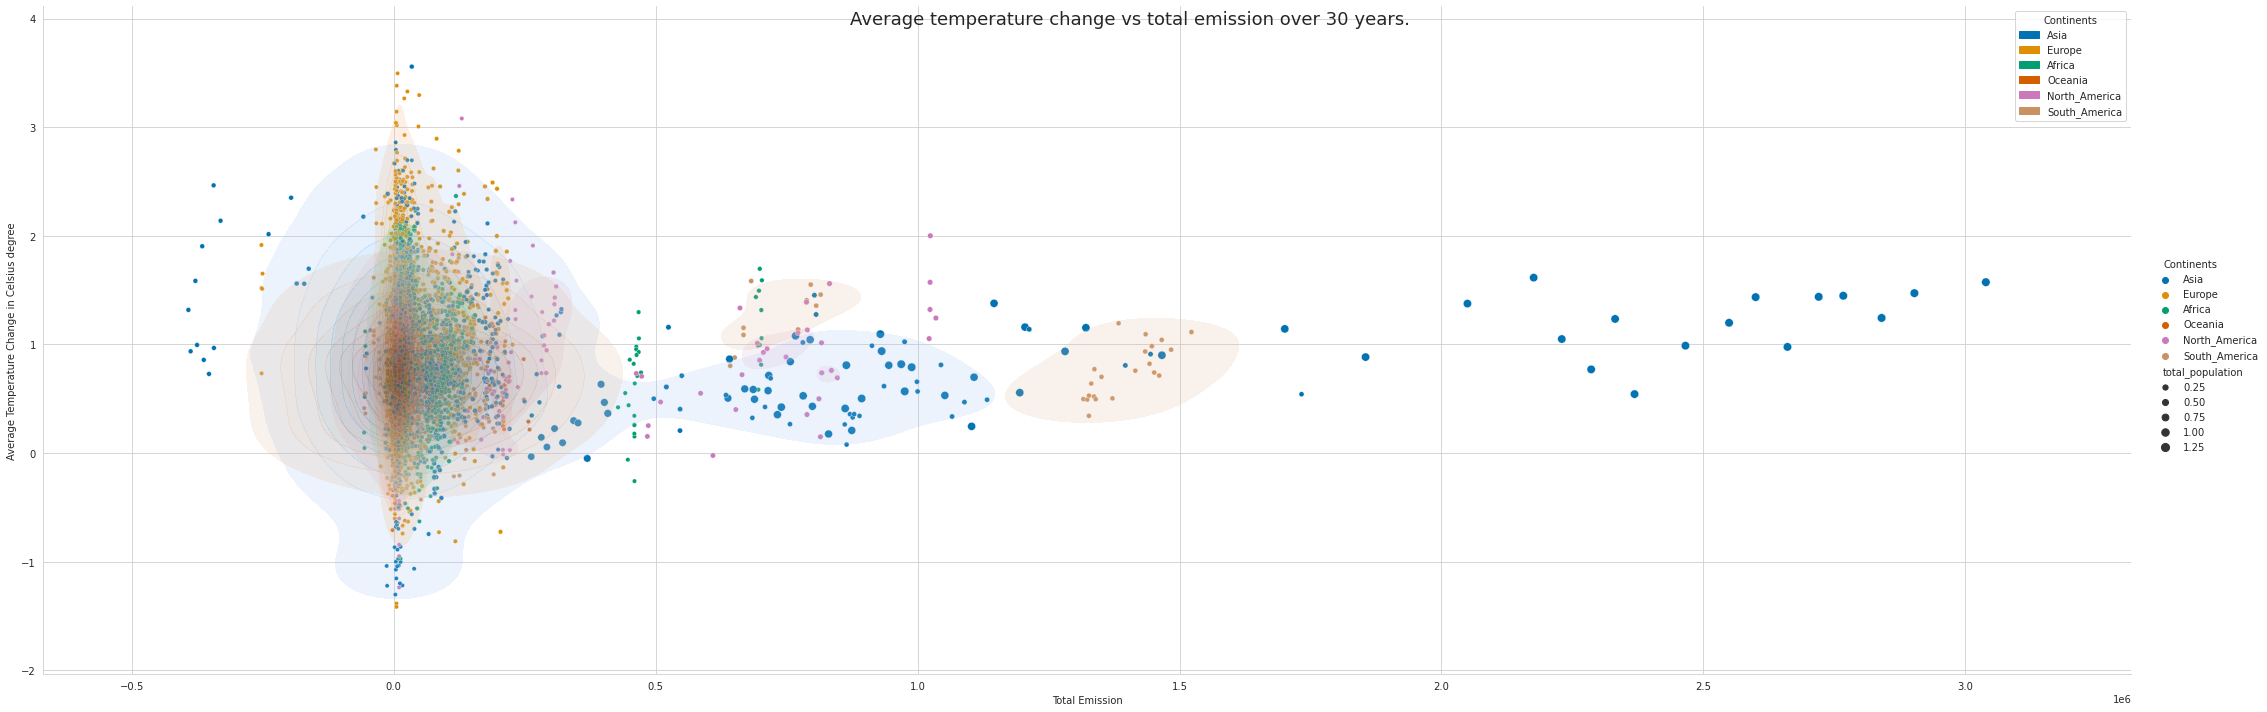

In [626]:
g = sns.relplot(x = 'total_emission',
                y = 'Average_Temperature_C',
                data = df,
                size = 'total_population',
                hue = 'Continents',
                height = 10,
                aspect = 3
                )
sns.kdeplot(x = 'total_emission',
            y = 'Average_Temperature_C',
            data = df,
            kind = 'kde',
            hue = 'Continents',
            fill = True,
            common_norm = False,
            alpha = 0.2
            )
g.fig.suptitle('Average temperature change vs total emission over 30 years.', fontsize = 18)
g.set(xlabel = 'Total Emission',
      ylabel = 'Average Temperature Change in Celsius degree')

plt.show()

## Emission by regions

World_regions     Continents  total_emission
0                    Melanesia        Oceania    1.148229e+06
1                    Polynesia        Oceania    1.302897e+06
2                   Micronesia        Oceania    1.525515e+06
3                 Central Asia           Asia    2.625027e+06
4              Central America  North_America    3.409985e+06
5                    Caribbean  North_America    4.760109e+06
6                 Western Asia           Asia    4.795186e+06
7              Southern Africa         Africa    5.542095e+06
8   Australia And New Zealand         Oceania    6.317674e+06
9               Eastern Europe         Europe    6.535580e+06
10             Northern Europe         Europe    7.884556e+06
11             Northern Africa         Africa    8.417827e+06
12              Western Africa         Africa    8.588273e+06
13             Southern Europe         Europe    1.069584e+07
14              Western Europe         Europe    1.666618e+07
15              Eastern Africa         Africa    1.669786e+07
16               Middle Africa         Africa    2.550740e+07
17                  South Asia           Asia    3.066756e+07
18               North America  North_America    3.667396e+07
19              Southeast Asia           Asia    4.844686e+07
20               South America  South_America    6.092904e+07
21                   East Asia           Asia    7.024067e+07

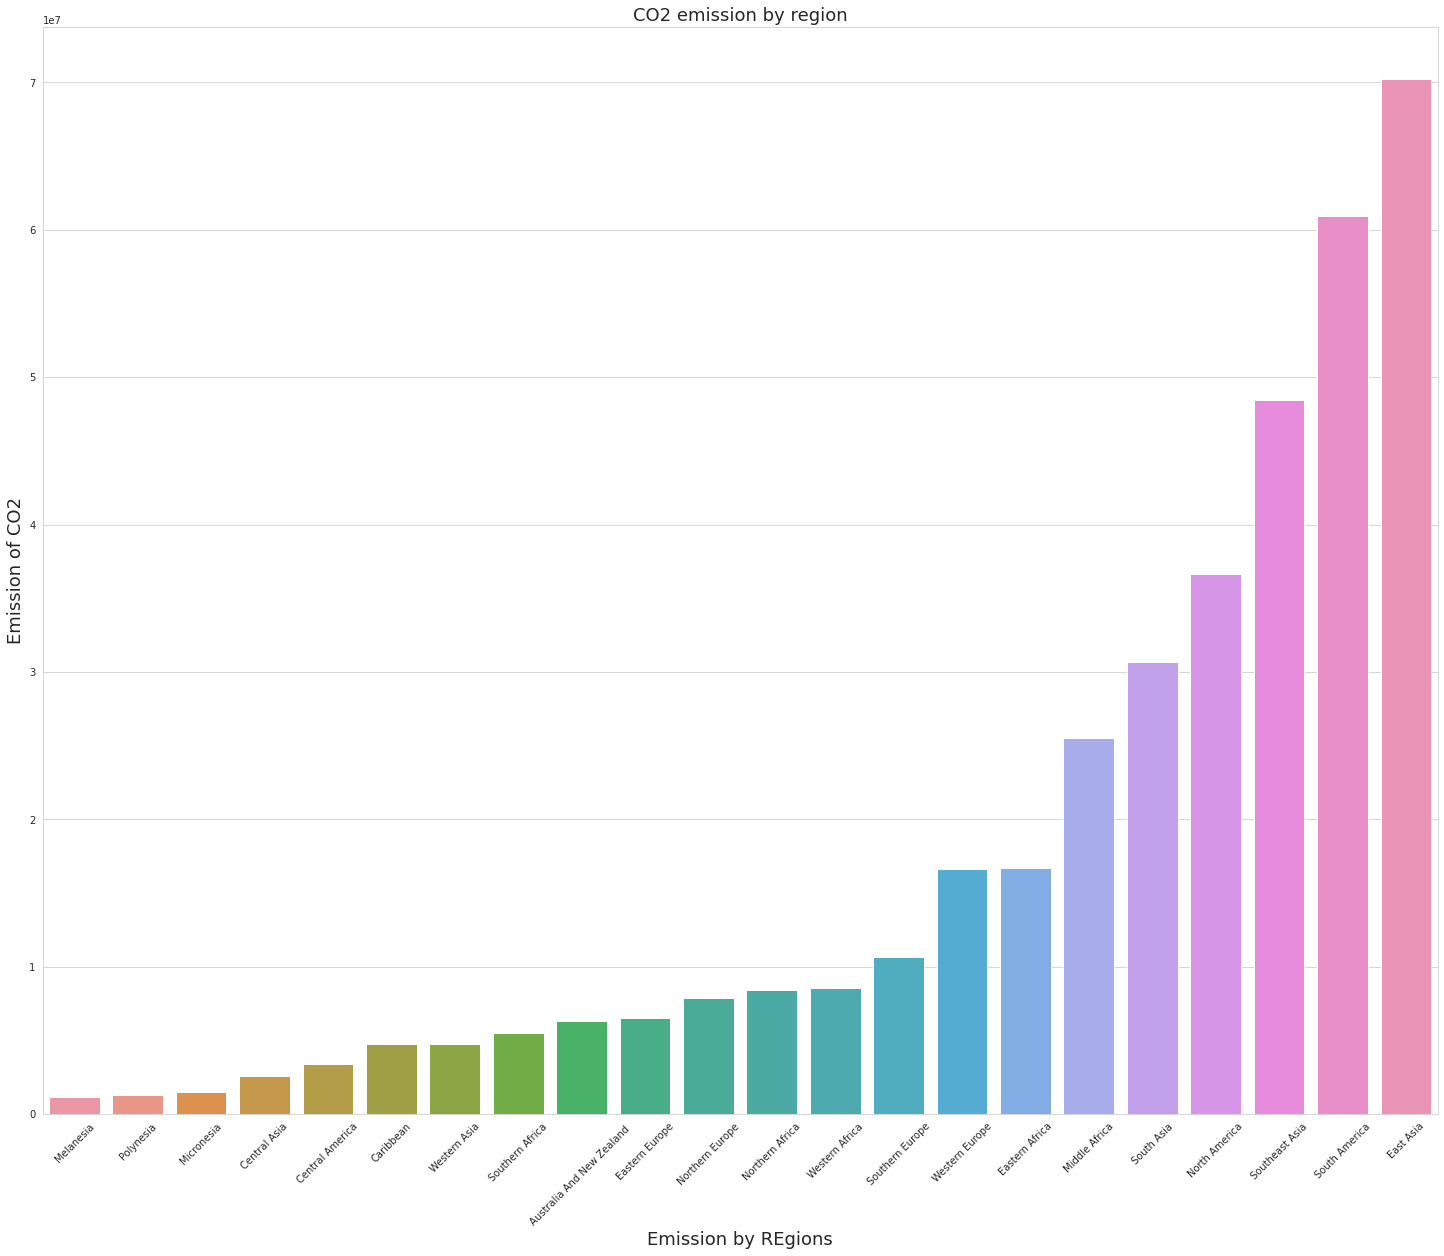

In [684]:
summed_emission = df.groupby(['World_regions','Continents'])[('total_emission')].agg('sum').sort_values().reset_index()

'''pingouin.anova(summed_emission,
               dv = 'total_emission',
               between = 'World_regions')'''
sns.barplot(data = summed_emission, x = 'World_regions', y = 'total_emission')
plt.title('CO2 emission by region', fontsize = 18)
plt.xlabel('Emission by REgions', fontsize = 18)
plt.ylabel('Emission of CO2', fontsize = 18)
plt.xticks(rotation = 45)
summed_emission

In [598]:
df_europe = df[df['Continents']=='Europe']
df_northAmerica = df[(df['Continents']=='North_America') & (df['World_regions'] != 'North America')]
df_NA = df[(df['Continents'] == 'North_America') & (df['World_regions'] == 'North America')]
df_southamerica = df[(df['Continents']=='South_America')]
df_africa = df.query("Continents == 'Africa'")
df_CA = df[(df['Continents'] == 'Asia') & (df['World_regions'] == 'Central Asia') ]
df_asia = df[(df['Continents'] == 'Asia') & (df['World_regions'] != 'Central Asia') ]
df_AU_NZ = df[(df['Continents'] == 'Oceania') & (df['World_regions'] == 'Australia And New Zealand ')]
df_oceania = df[(df['Continents'] == 'Oceania') & (df['World_regions'] != 'Australia And New Zealand ')]

def region_kdePlot(dataframe, xsettings):

    marker = itertools.cycle(['o','.', 'v', '^', '<', '>', '1', '2', '3', '4', '8', 's', 'p', 'P', '*', 'h', 'H', '+', 'x', 'X', 'D', 'd', '|', '_'])
    markers = [next(marker) for i in range(len(dataframe['Area'].unique()))]

    g = sns.FacetGrid(dataframe,
                  col="World_regions",
                  col_wrap=2, height=6,
                  aspect = 2,
                  xlim = xsettings,
                  ylim = (-3,4),
                  sharex = True
                  )
    g.map(sns.kdeplot,
        "total_emission",
        "Average_Temperature_C",
        fill = True,
        alpha = 0.5)
    g.map(sns.scatterplot,
        "total_emission",
        "Average_Temperature_C",
        hue = dataframe['Area'],
        size = dataframe['total_population'],
        markers = markers)
    g.set_titles(col_template="{col_name}", row_template="{row_name}")
    g.set(xlabel = 'Emission of CO2 (ton)',
        ylabel = 'Temperture raise in Celsius degree')
    g.add_legend()
    plt.show()

In [599]:
#(df.groupby(['Area','World_regions'])['total_population'].last())

### Europe

Europe has been divided into four regions. Each plot shows a different region and the scatterplot represents the countris in that region and the size of the points are the total population.
It can be seen that the points are separated into groups according to a country's total emission.
Multiple dots for the same color represents the emissions yearly and it's overlapping with the density plot that represents the emission density hotspots.

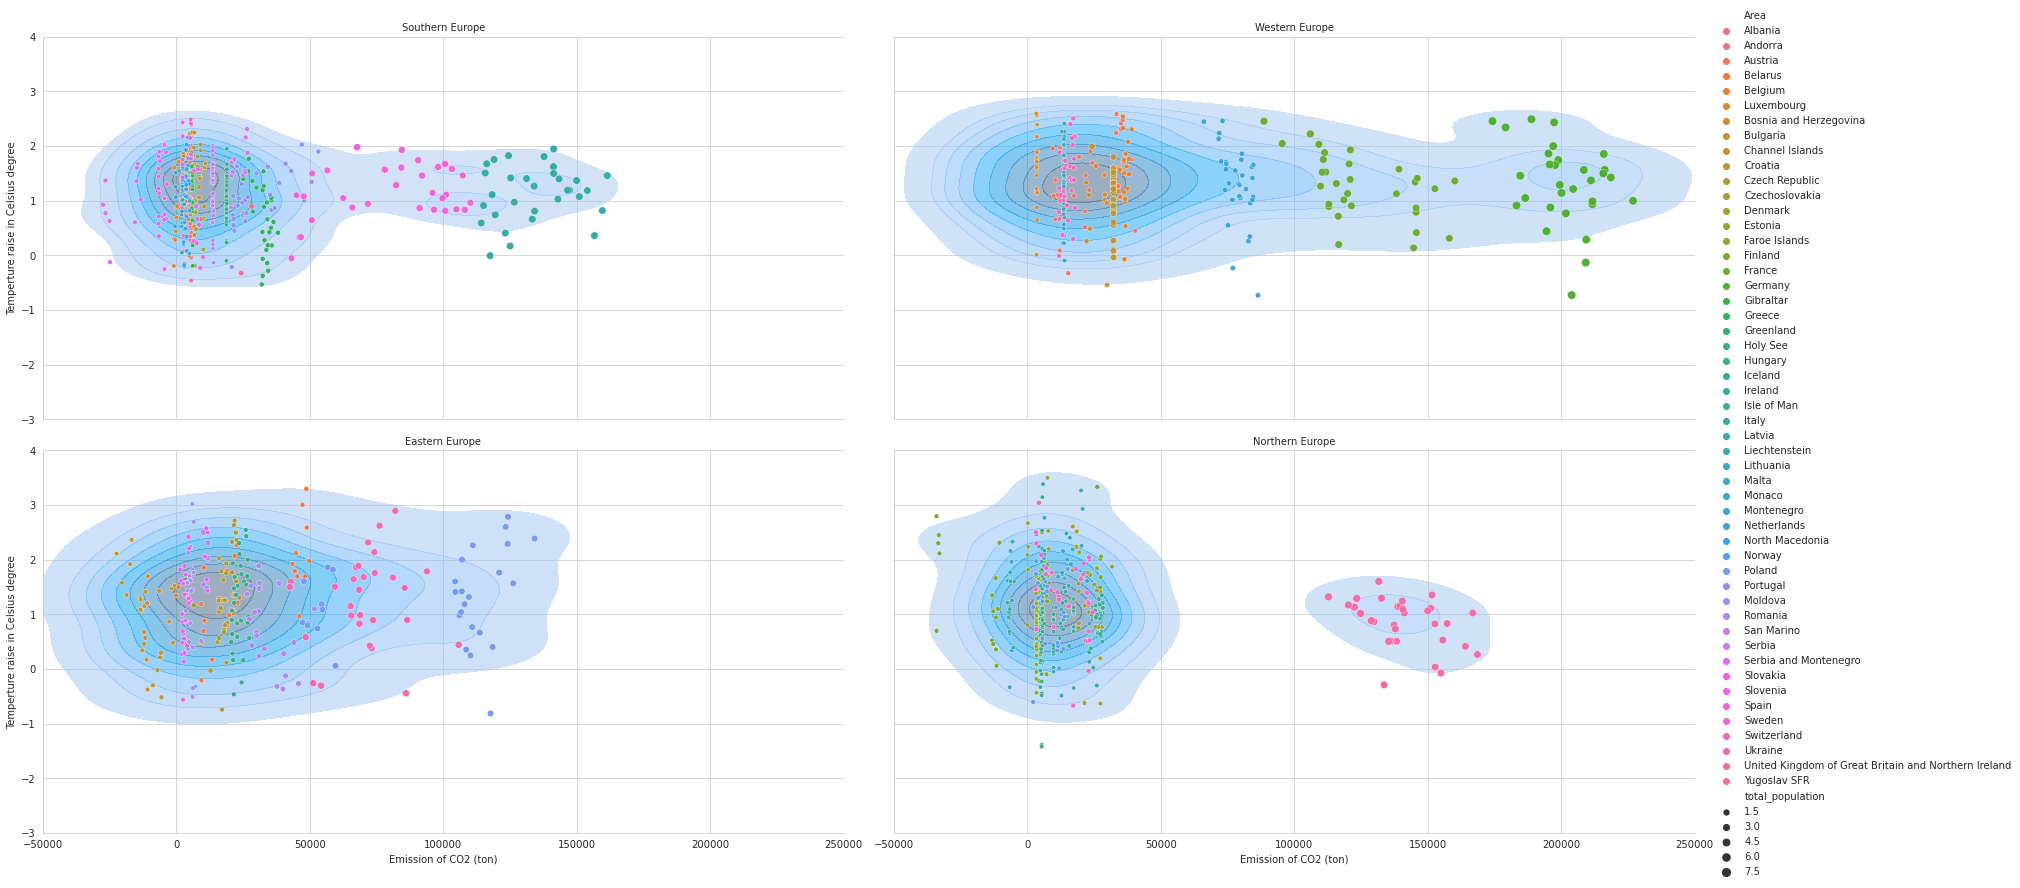

In [600]:
region_kdePlot(df_europe, (-50000,250000))

### North America


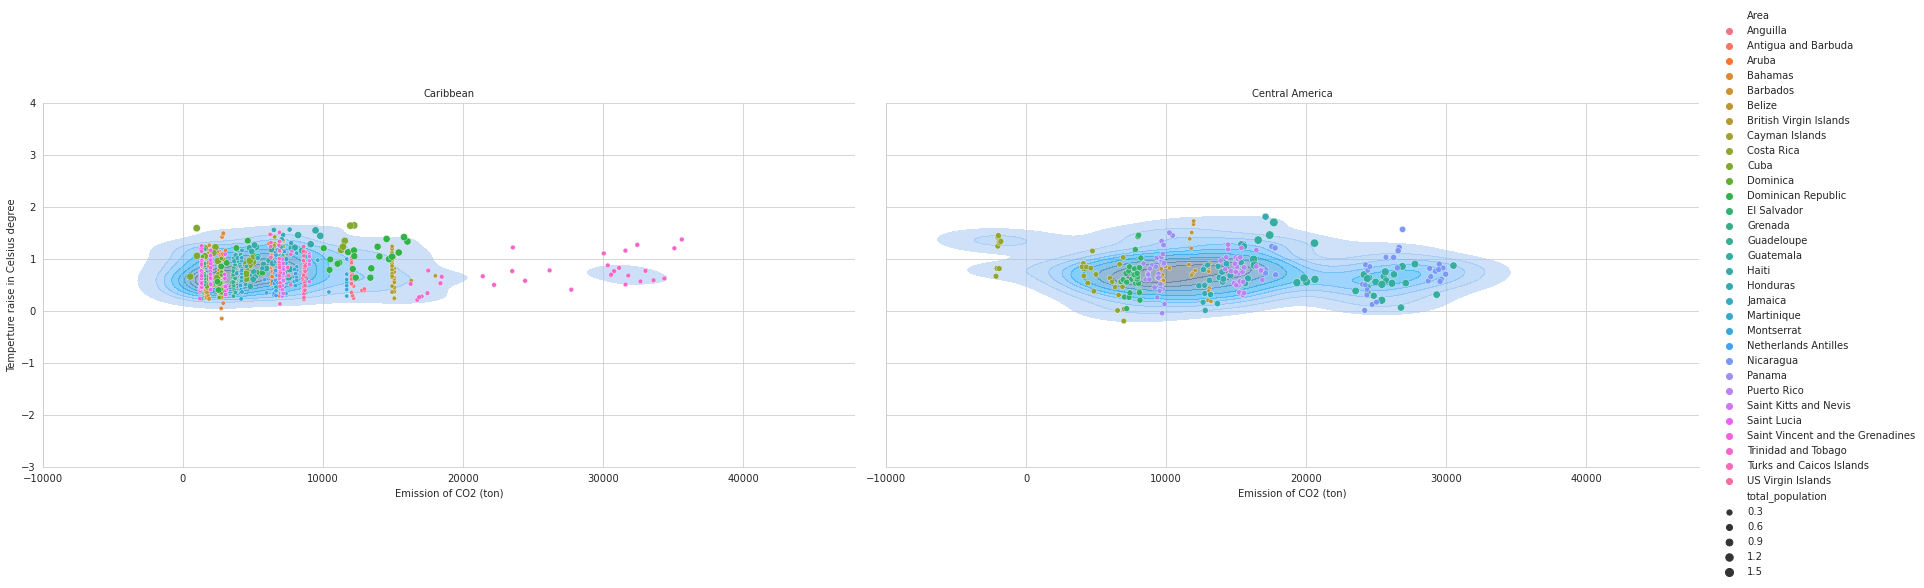

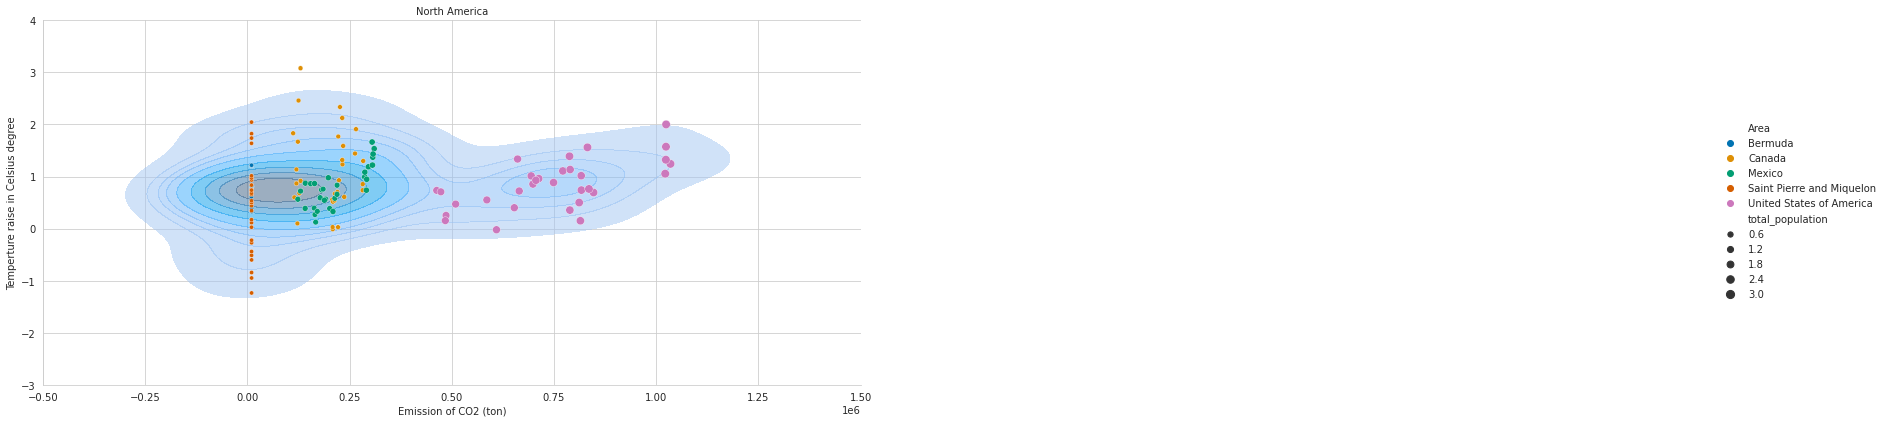

In [601]:
region_kdePlot(df_northAmerica, (-10000,48000))
region_kdePlot(df_NA, (-500000,1500000))

### South America

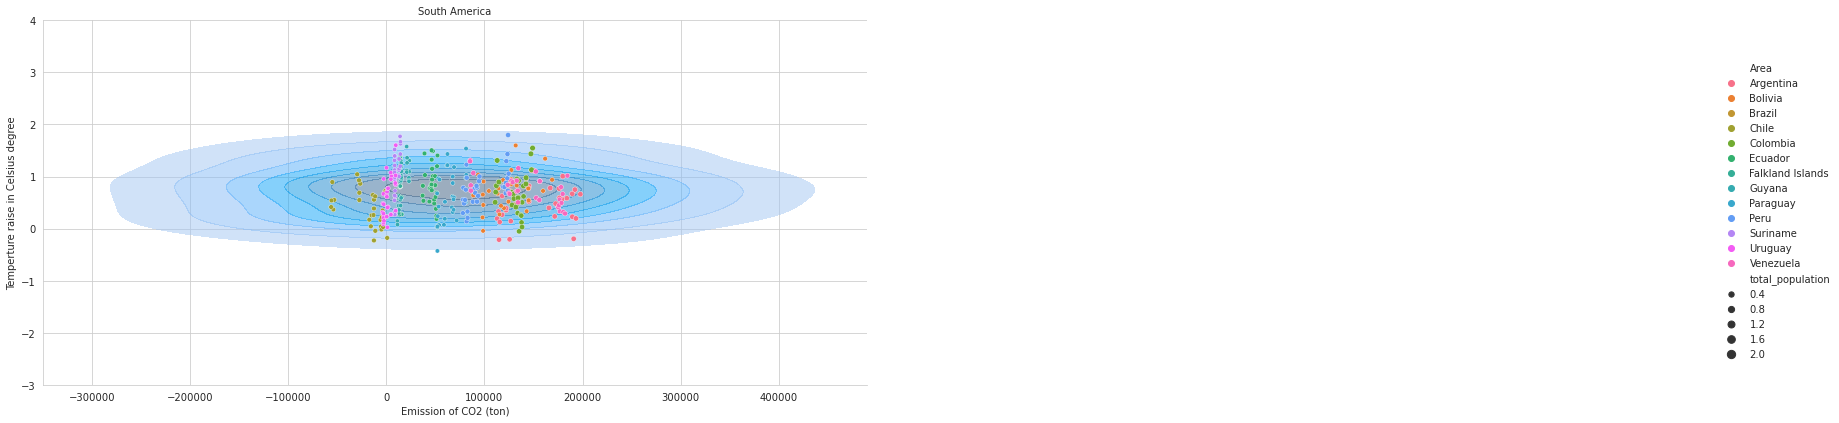

In [602]:
region_kdePlot(df_southamerica, (-350000,490000))

### Africa

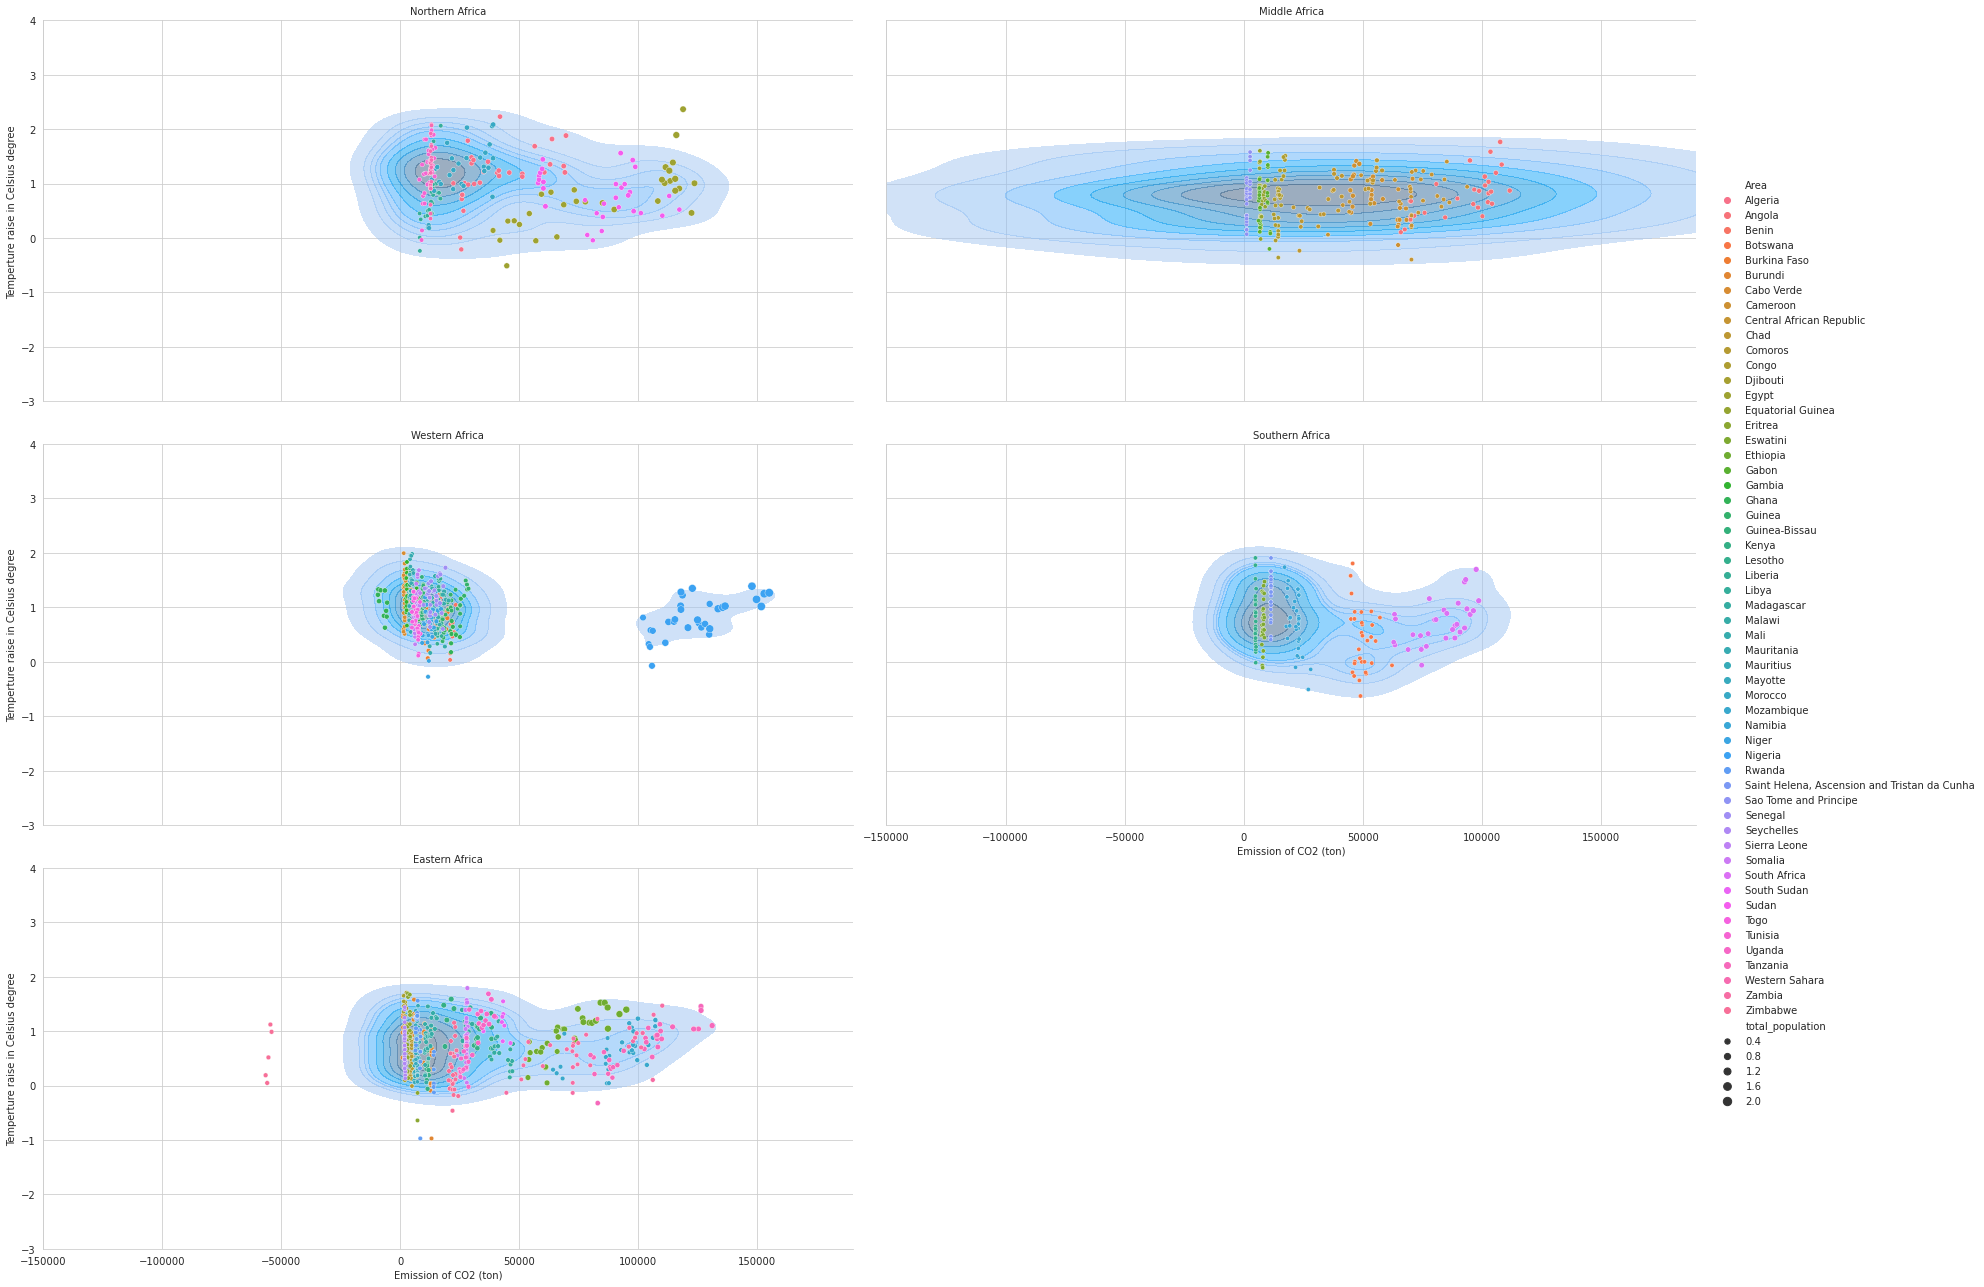

In [603]:
region_kdePlot(df_africa, (-150000,190000))

### Asia

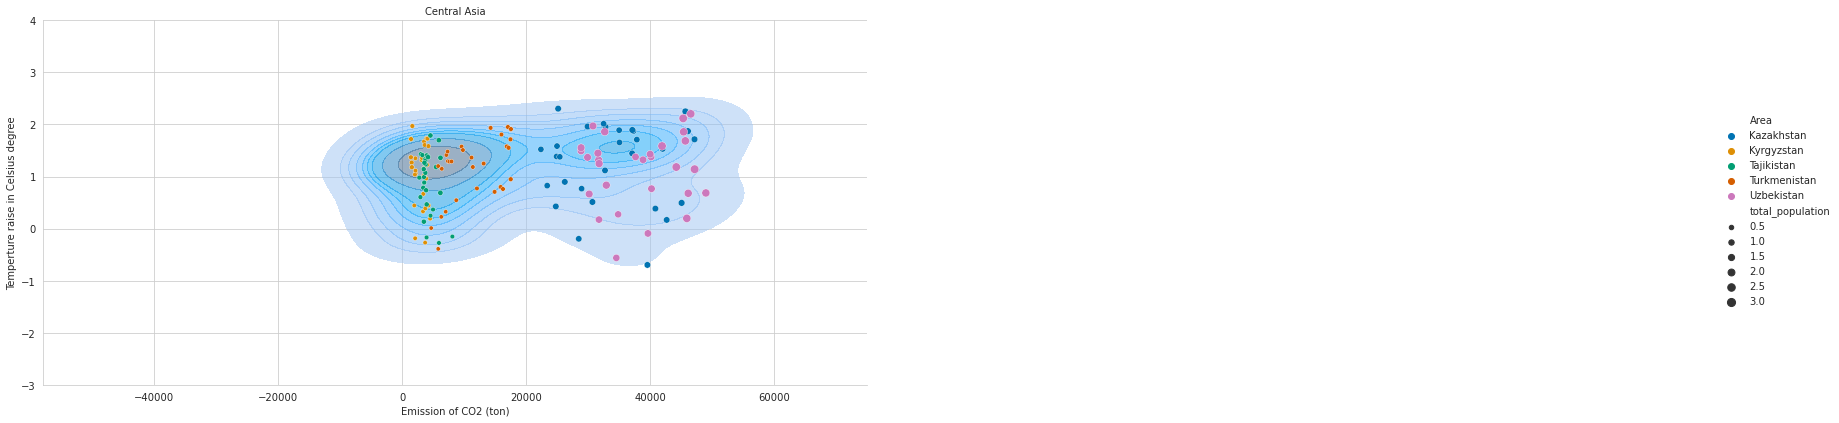

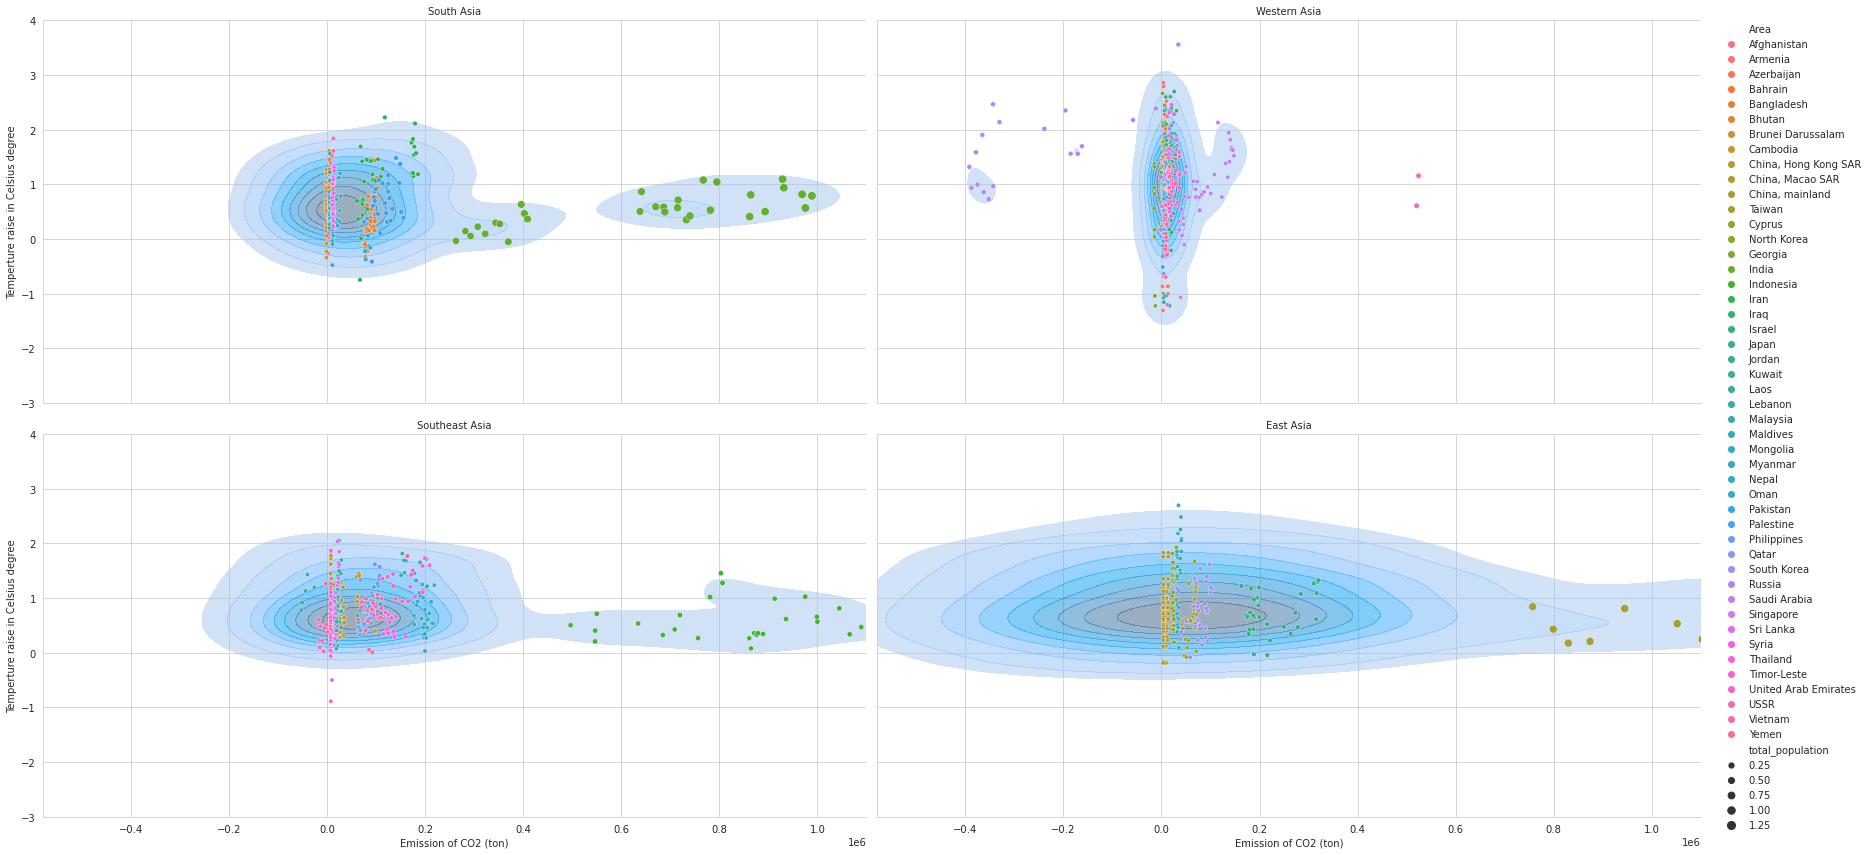

In [604]:
region_kdePlot(df_CA, (-58000,75000))
region_kdePlot(df_asia, (-580000,1100000))

### Australia and Oceania

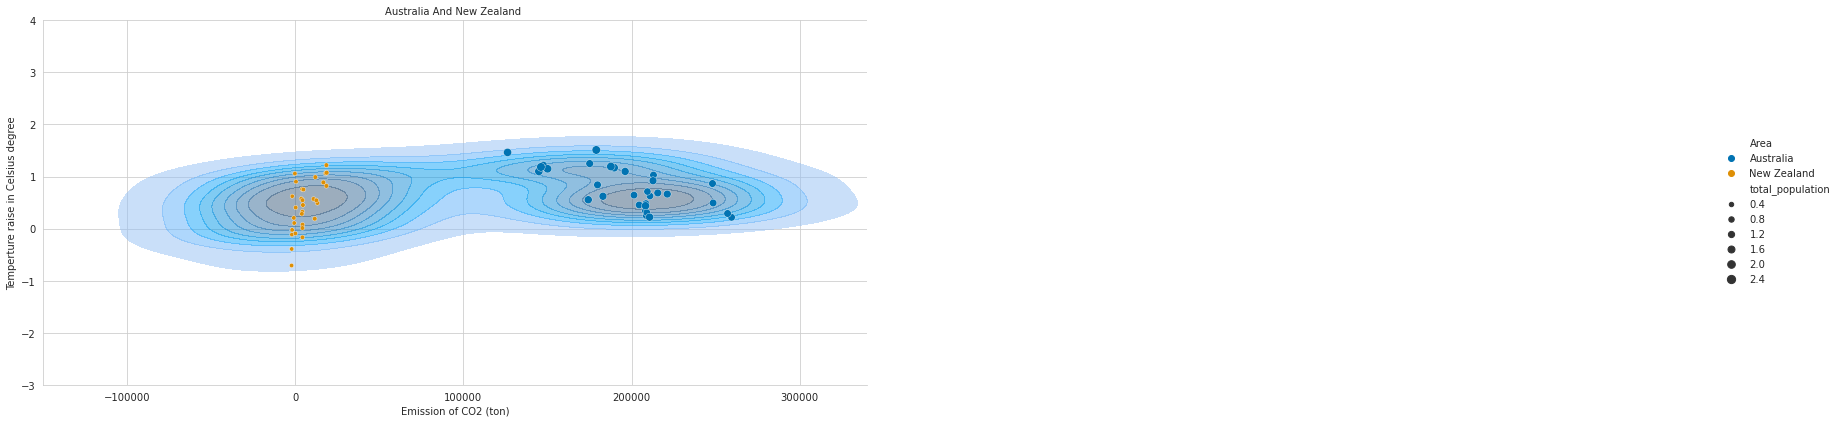

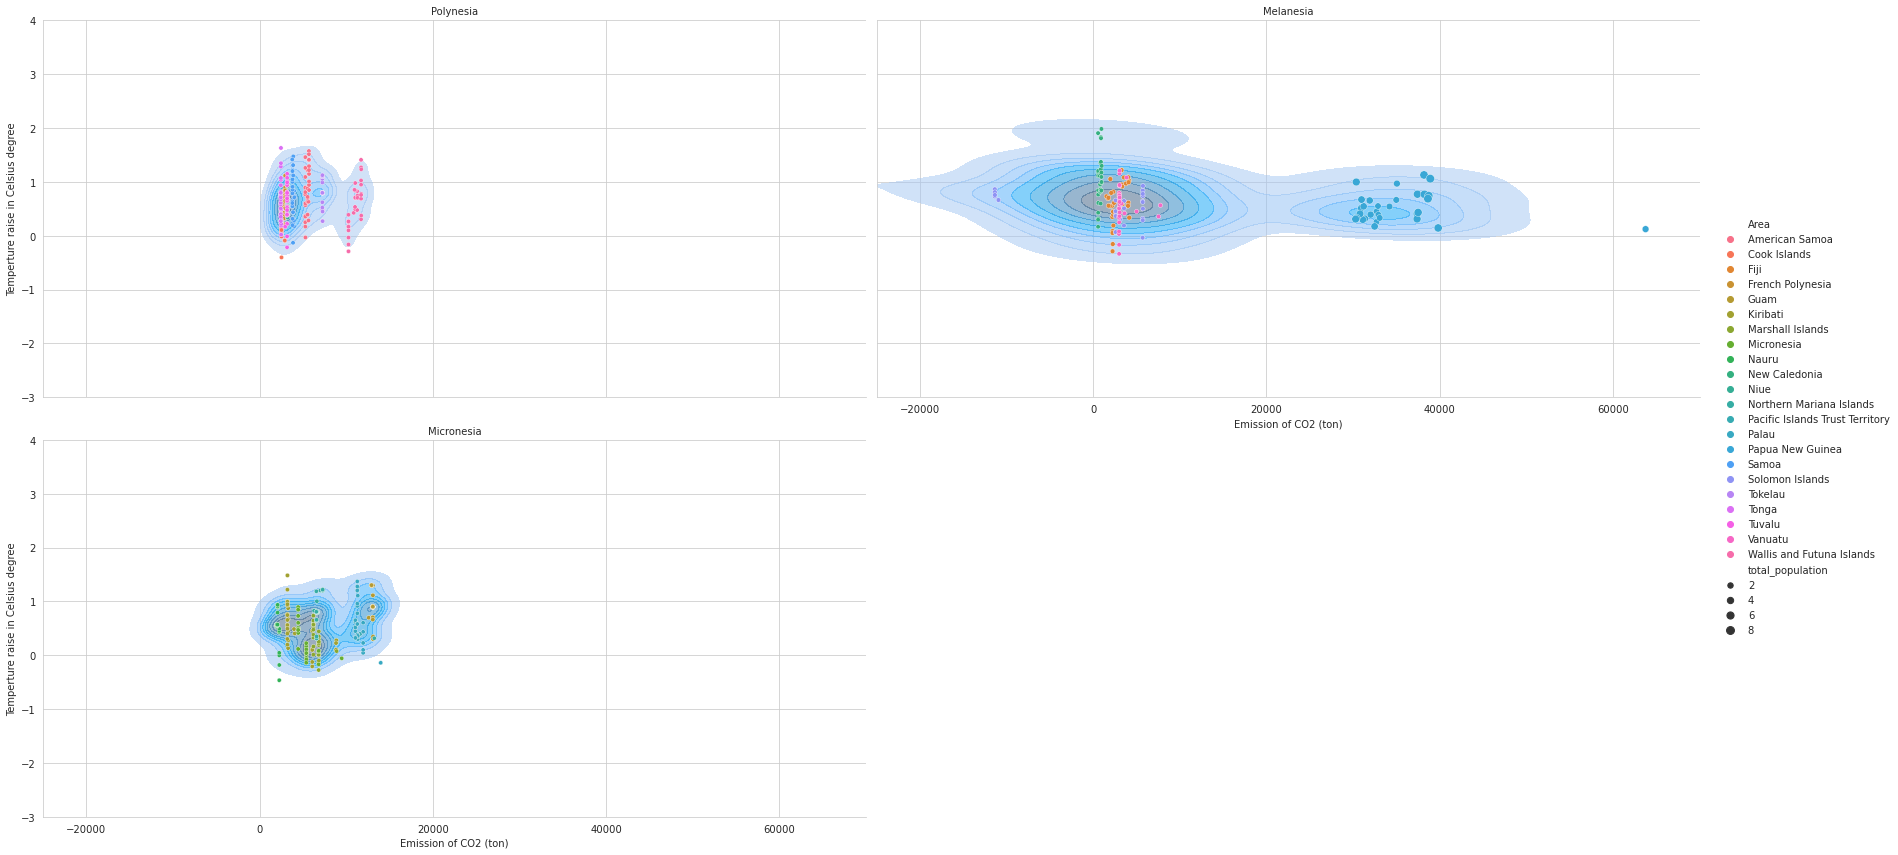

In [605]:
region_kdePlot(df_AU_NZ, (-150000,340000))
region_kdePlot(df_oceania, (-25000,70000))

## Emissions per capita

Let's have a look the emission per capita in the different regions instead of countries. 

In [606]:
df_emiPerCapita = df[['Area', 'Year', 'Forestland', 'total_emission', 'total_population','Continents','World_regions']]
df_emiPerCapita['Emission_Per_Capita'] = df_emiPerCapita['total_emission'] / df_emiPerCapita['total_population']
df = pd.concat([df, df_emiPerCapita['Emission_Per_Capita']], axis = 1)
df_emiPerCapita_mean = df_emiPerCapita.groupby('Area')['Emission_Per_Capita'].mean()
df_emiPerCapita_mean.sort_values(ascending = False).head(n=10).reset_index()

Area  Emission_Per_Capita
0                                      Holy See            30.512951
1                                       Tokelau             4.707367
2                              Falkland Islands             4.611468
3  Saint Helena, Ascension and Tristan da Cunha             1.981689
4                     Saint Pierre and Miquelon             1.659791
5                                          Niue             1.614958
6                                    Montserrat             1.593782
7                                      Anguilla             1.065676
8                     Wallis and Futuna Islands             0.824501
9                        British Virgin Islands             0.677127

We have a rather interesting result for the emission per capita. It seems that city-state and small islands are on the top of the list. This is due to the fact that the population is rather small on these places and to the emission in this dataset
has many contributing sources. the main sources for the emission are coming from food transport / packaging / disposal, household consumption and electricity use.

In [607]:
df_emiPCTail = df_emiPerCapita_mean.sort_values(ascending = True).head(n=10).reset_index()
df_emiPCTail

Area  Emission_Per_Capita
0        Solomon Islands            -0.005859
1               Bulgaria            -0.001299
2               Slovenia            -0.001155
3                  Chile            -0.001090
4                 Russia            -0.001037
5                Romania            -0.000863
6                Finland            -0.000644
7                 Latvia            -0.000552
8  Serbia and Montenegro            -0.000504
9                 Bhutan            -0.000418

How much the Forestland - Carbon Sink - offsets the emission per capita? By looking at the least polluting countries compared how they are ranked by Forestland.

In [608]:
df_forest = df.groupby('Area')['Forestland'].sum().reset_index()
df_forest['Rank'] = df_forest['Forestland'].rank(ascending = True)

df_forest[df_forest['Area'].isin(df_emiPCTail['Area'])].sort_values(by = 'Rank')

Area    Forestland  Rank
169                 Russia -1.871147e+07   1.0
168                Romania -1.610836e+06  11.0
41                   Chile -1.293248e+06  17.0
70                 Finland -1.211285e+06  20.0
30                Bulgaria -8.179881e+05  25.0
188        Solomon Islands -3.715884e+05  37.0
110                 Latvia -3.533902e+05  38.0
187               Slovenia -2.348045e+05  43.0
182  Serbia and Montenegro -2.283227e+05  45.0
23                  Bhutan -1.519843e+05  51.0

The countries on the list with the less emission per capita are from countries that has somewhat significant forest coverage.    
There is only one country that is on the list of the emission per capita list, Russia.    

In [609]:
df_forest.sort_values('Rank').head(10)

Area    Forestland  Rank
169                    Russia -1.871147e+07   1.0
219  United States of America -1.410334e+07   2.0
44            China, mainland -1.401762e+07   3.0
27                     Brazil -1.280256e+07   4.0
94                  Indonesia -5.811219e+06   5.0
93                      India -3.304575e+06   6.0
36                     Canada -2.976688e+06   7.0
102                     Japan -2.420289e+06   8.0
71                     France -1.719899e+06   9.0
191               South Korea -1.641560e+06  10.0

Let's have a look the emission per capita by worldwide regions.

In [610]:
df_asiaEmiPerCap = df_emiPerCapita[df_emiPerCapita['Continents'] == 'Asia']
df_africaEmiPerCap = df_emiPerCapita[(df_emiPerCapita['Continents'] == 'Africa') & (df_emiPerCapita['World_regions'] != 'Southern Africa')]
df_SAfricaEmiPerCap = df_emiPerCapita[(df_emiPerCapita['Continents'] == 'Africa') & (df_emiPerCapita['World_regions'] == 'Southern Africa')]
df_europeEmiPerCap = df_emiPerCapita[(df_emiPerCapita['Continents'] == 'Europe') & ((df_emiPerCapita['World_regions'] != 'Southern Europe') & (df_emiPerCapita['World_regions'] != 'Eastern Europe'))]
df_sEuropeEmiPerCap = df_emiPerCapita[(df_emiPerCapita['Continents'] == 'Europe') & (df_emiPerCapita['World_regions'] == 'Southern Europe')]
df_eEuropeEmiPerCap = df_emiPerCapita[(df_emiPerCapita['Continents'] == 'Europe') & (df_emiPerCapita['World_regions'] == 'Eastern Europe')]
df_oceaniaEmiPerCap = df_emiPerCapita[(df_emiPerCapita['Continents'] == 'Oceania') & (df_emiPerCapita['World_regions'] != 'Polynesia') & (df_emiPerCapita['World_regions'] != 'Micronesia')]
df_poliEmiPerCap = df_emiPerCapita[(df_emiPerCapita['Continents'] == 'Oceania') & (df_emiPerCapita['World_regions'] == 'Polynesia')]
df_microEmiPerCap = df_emiPerCapita[(df_emiPerCapita['Continents'] == 'Oceania') & (df_emiPerCapita['World_regions'] == 'Micronesia')]
df_cariEmiPerCap = df_emiPerCapita[(df_emiPerCapita['Continents'] == 'North_America') & (df_emiPerCapita['World_regions'] == 'Caribbean')]
df_NAEmiPerCap = df_emiPerCapita[(df_emiPerCapita['Continents'] == 'North_America') & (df_emiPerCapita['World_regions'] == 'North America')]
df_CAEmiPerCap = df_emiPerCapita[(df_emiPerCapita['Continents'] == 'North_America') & (df_emiPerCapita['World_regions'] == 'Central America')]
df_saEmiPerCap = df_emiPerCapita[df_emiPerCapita['Continents'] == 'South_America']


def emissionPerCapitaByContinent(dataset, ysettings):
     g = sns.FacetGrid(dataset,
                      col="World_regions",
                      col_wrap=2, height=6,
                      aspect = 2,
                      sharex = True,
                      ylim = ysettings
                  )
     g.map( sns.scatterplot,
               'total_population',
               'Emission_Per_Capita',
               hue = dataset['Area']
          )
     g.map( sns.kdeplot,
               'total_population',
               'Emission_Per_Capita',
          )
     g.set_titles(col_template="{col_name}")
     g.set(xlabel = 'Total population',
           ylabel = 'Emission per capita')
     g.add_legend()
     plt.show()

In [611]:
mean_emipercap = round((df_emiPerCapita.groupby(['Area','World_regions'])['Emission_Per_Capita'].mean()),4)
#pd.DataFrame(mean_emipercap).head(10)


### Europe

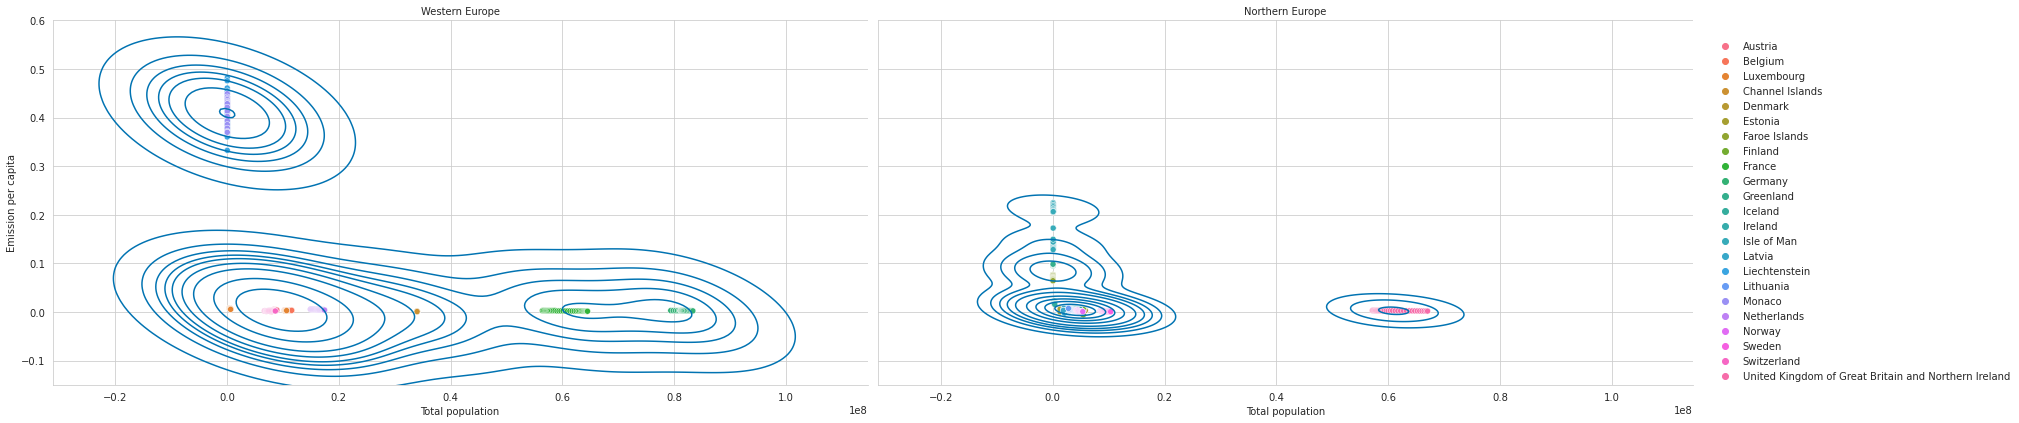

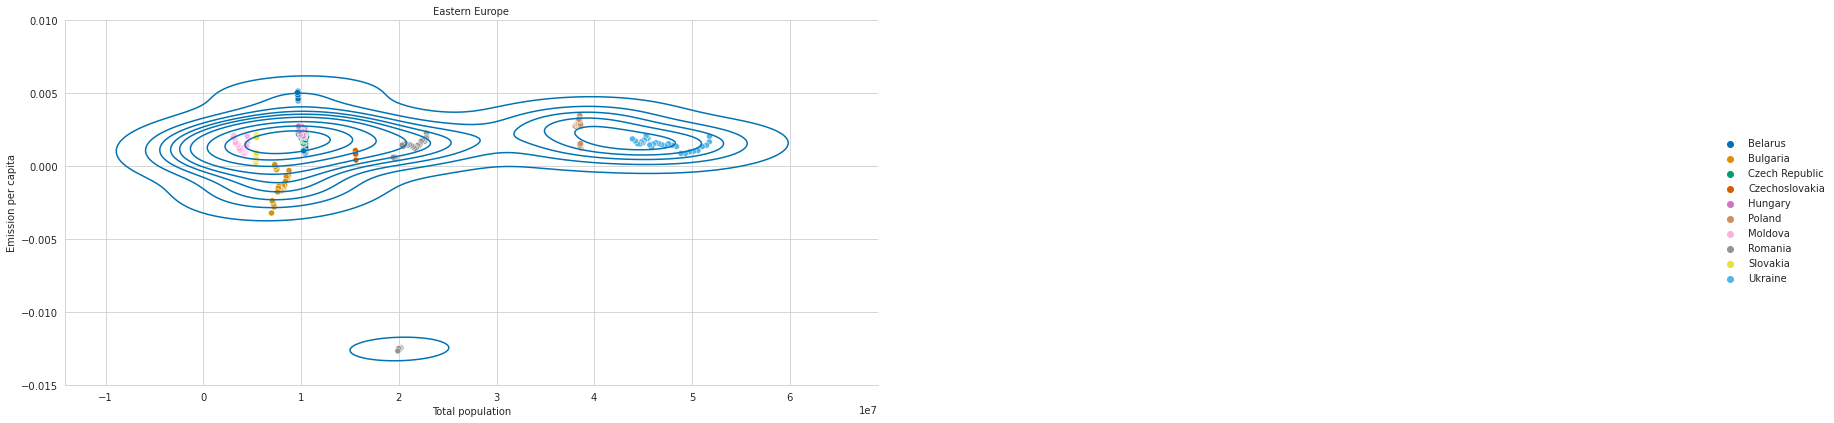

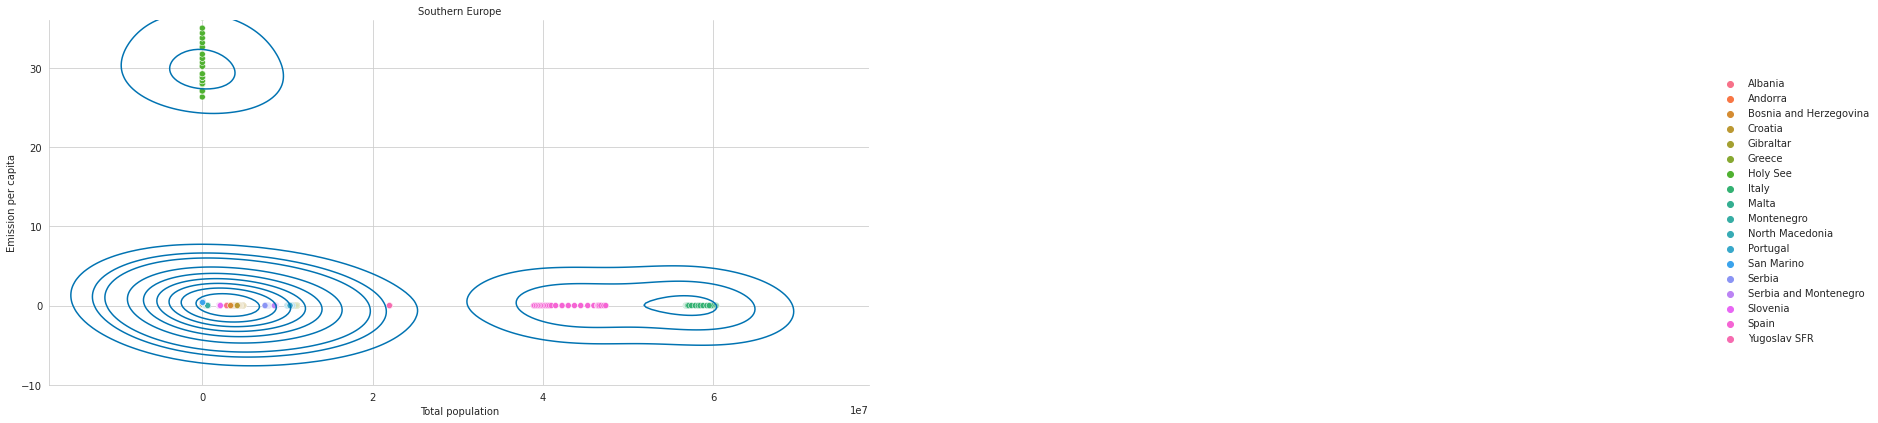

In [612]:
emissionPerCapitaByContinent(df_europeEmiPerCap, (-0.15,0.6))
emissionPerCapitaByContinent(df_eEuropeEmiPerCap, (-0.015, 0.01))
emissionPerCapitaByContinent(df_sEuropeEmiPerCap, (-10, 36))

### Asia

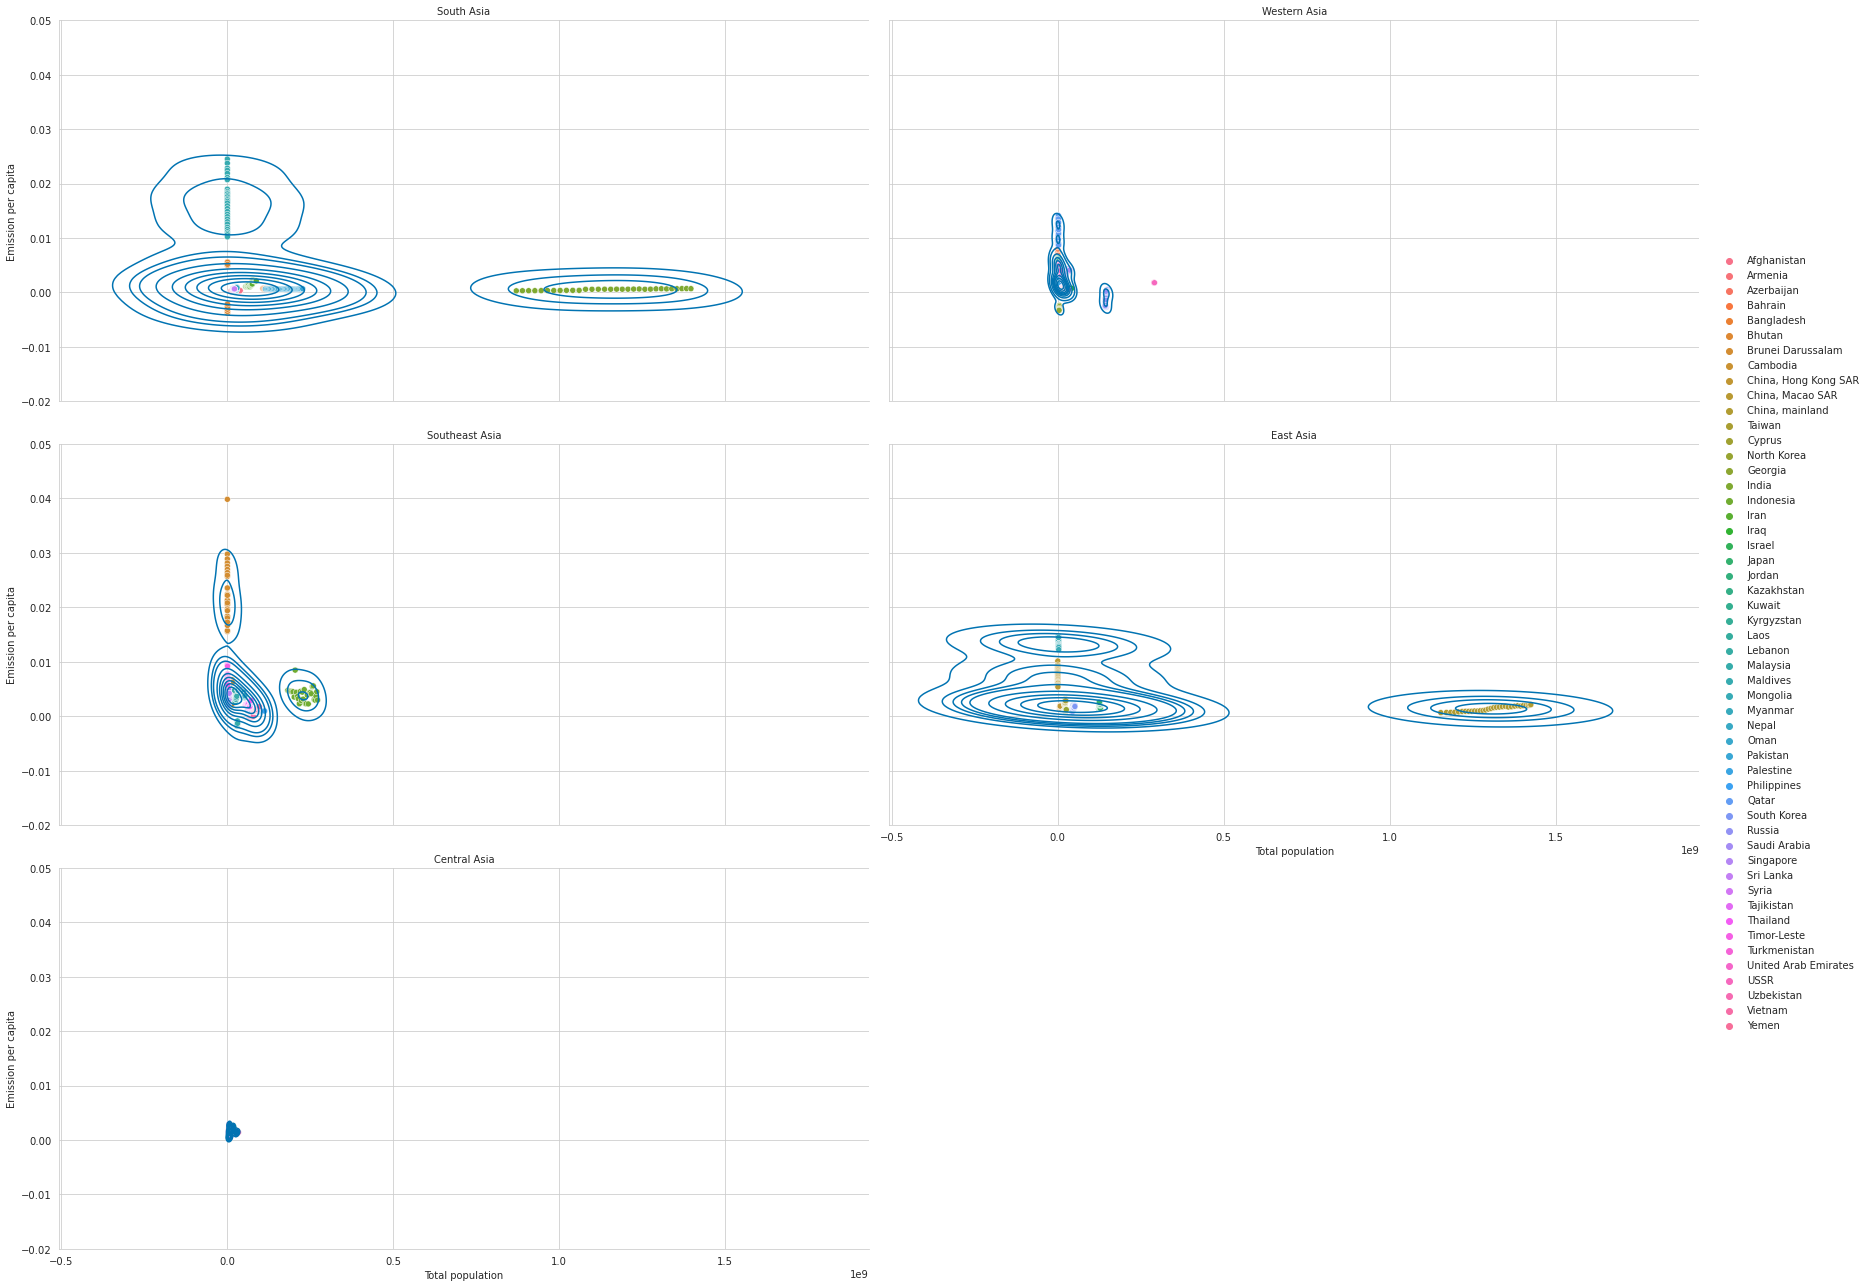

In [613]:
emissionPerCapitaByContinent(df_asiaEmiPerCap, (-0.02,0.05))

### Africa

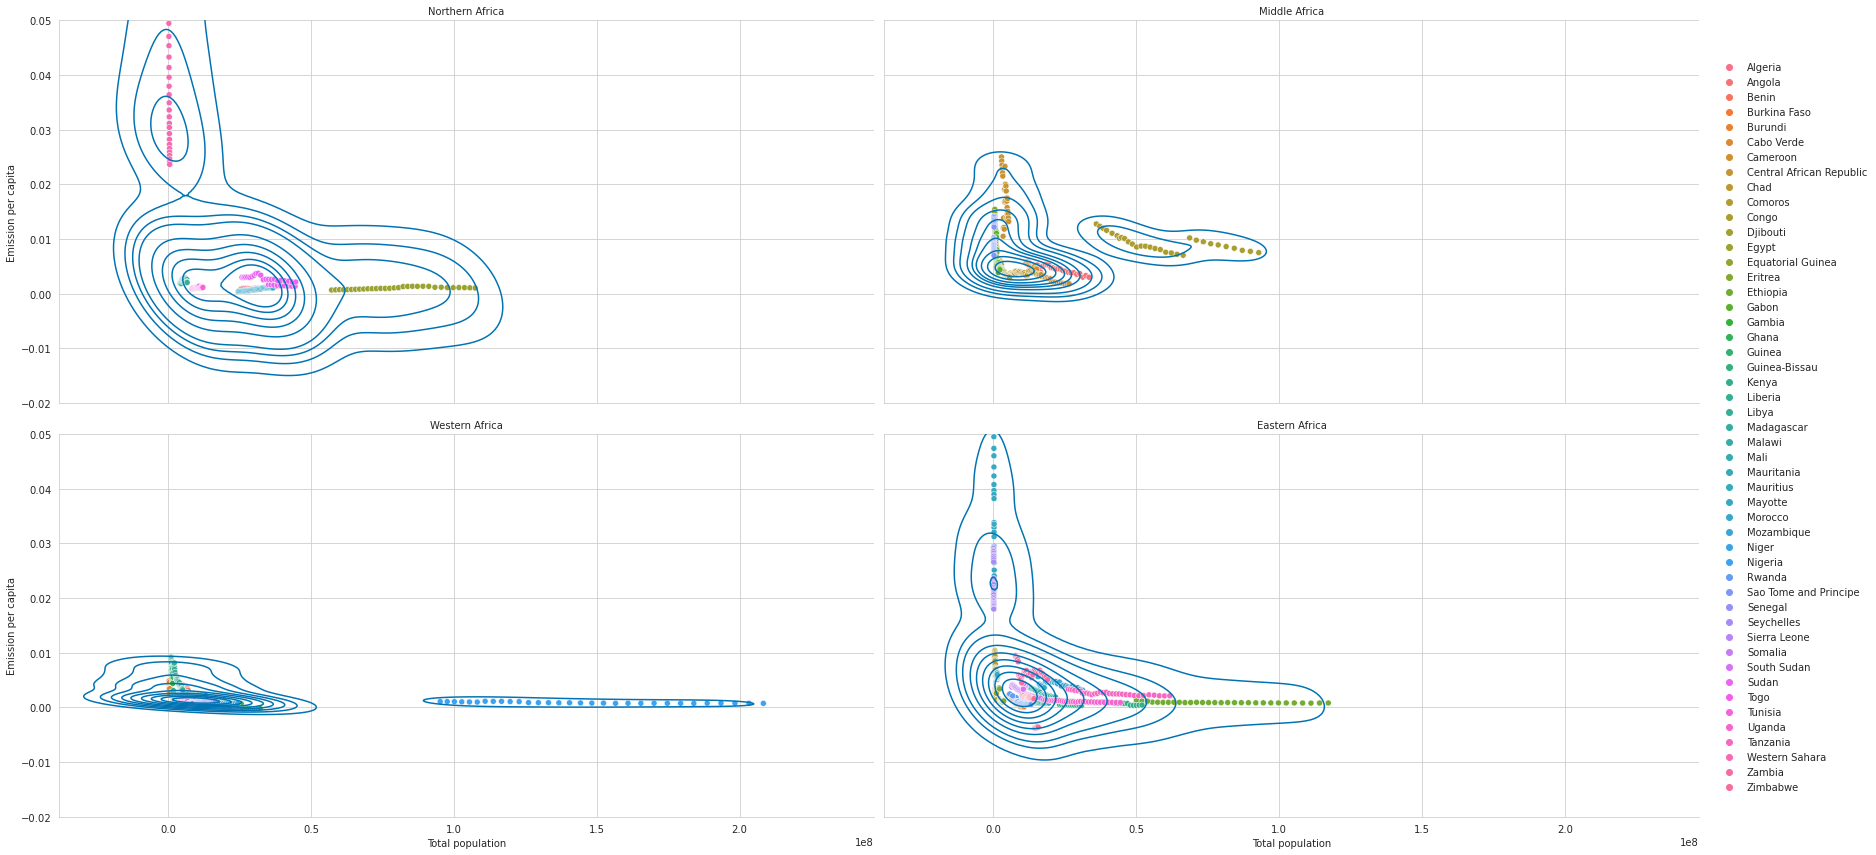

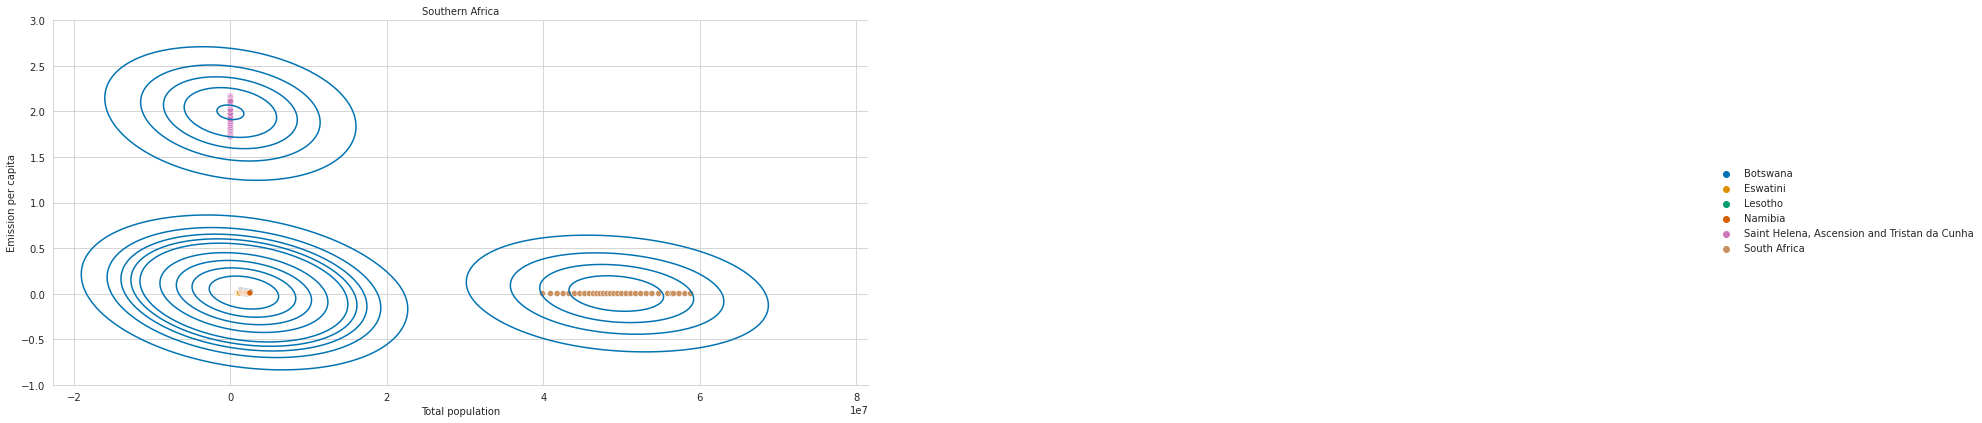

In [614]:
emissionPerCapitaByContinent(df_africaEmiPerCap, (-0.02,0.05))
emissionPerCapitaByContinent(df_SAfricaEmiPerCap, (-1,3))

### North America

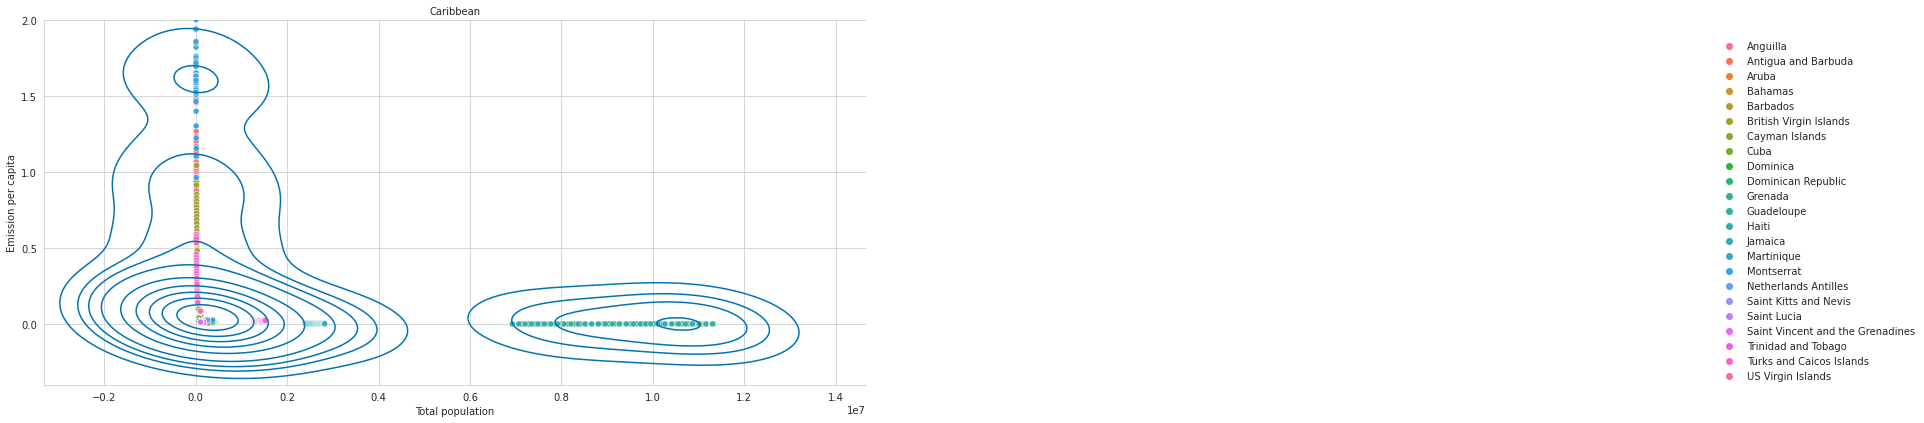

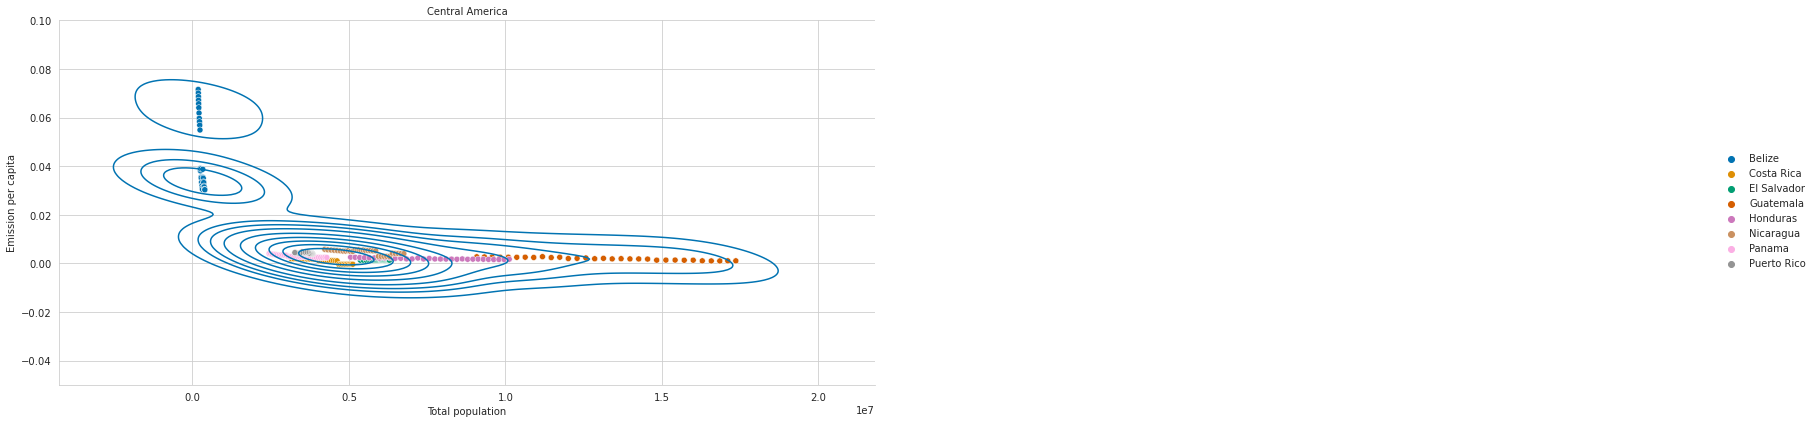

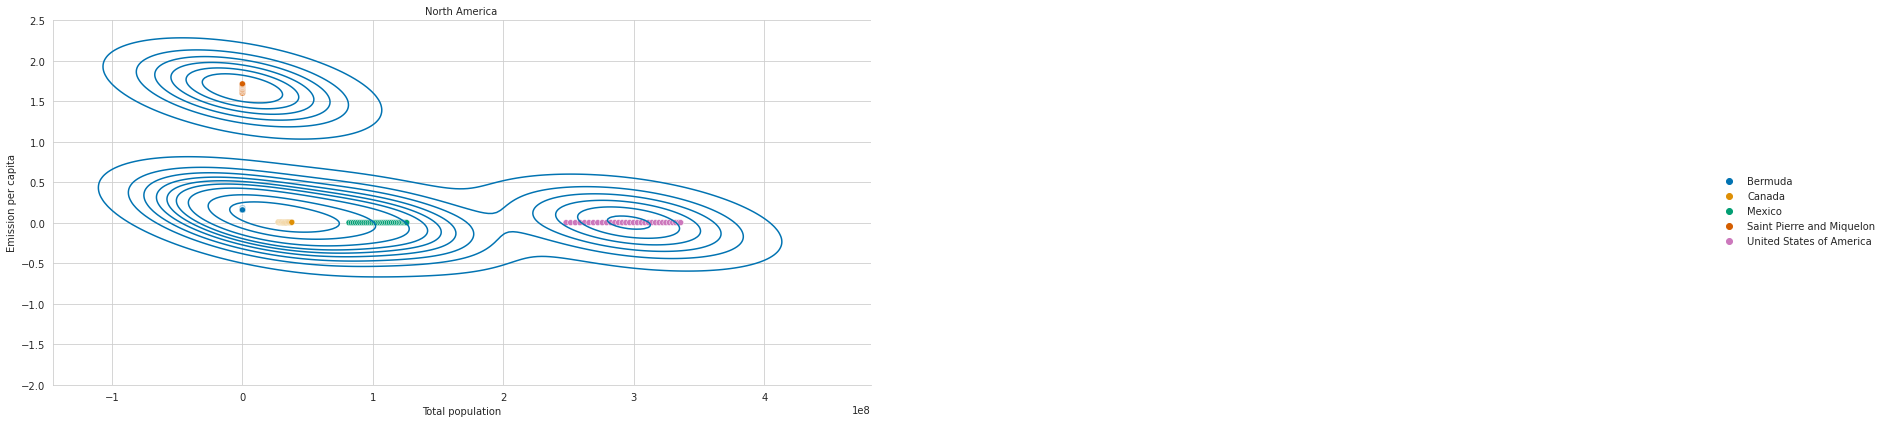

In [615]:
emissionPerCapitaByContinent(df_cariEmiPerCap, (-0.4, 2))
emissionPerCapitaByContinent(df_CAEmiPerCap, (-0.05, 0.1))
emissionPerCapitaByContinent(df_NAEmiPerCap, (-2, 2.5))


### South America

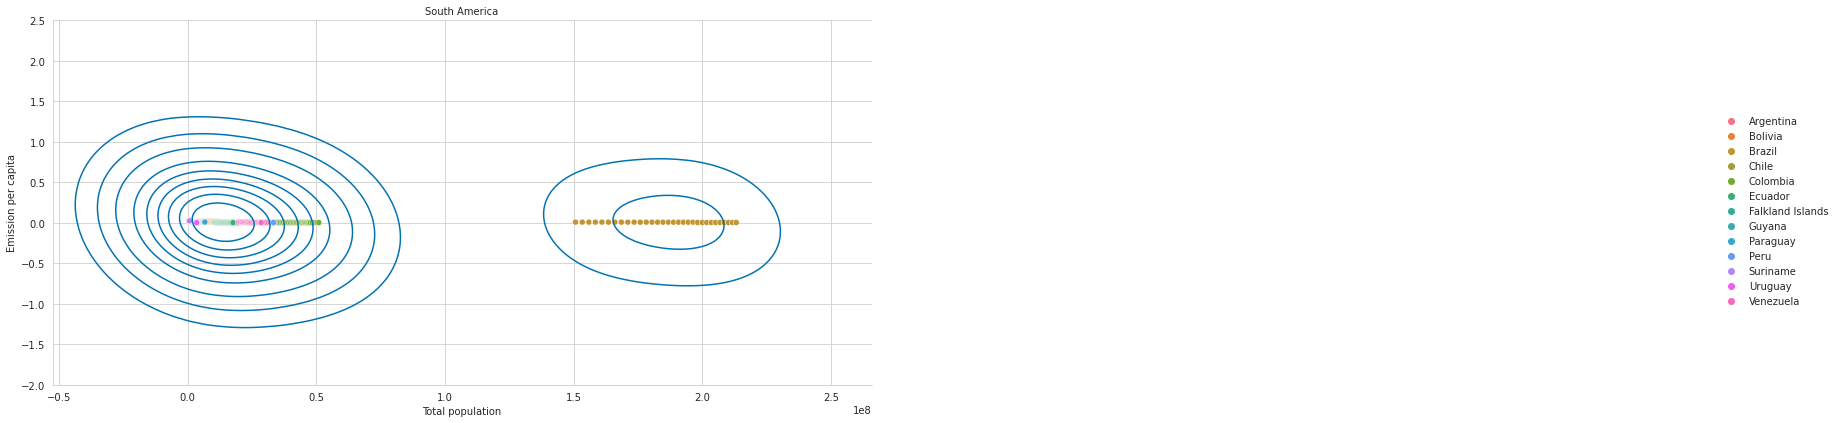

In [616]:
emissionPerCapitaByContinent(df_saEmiPerCap, (-2, 2.5))

### Australia and Oceania

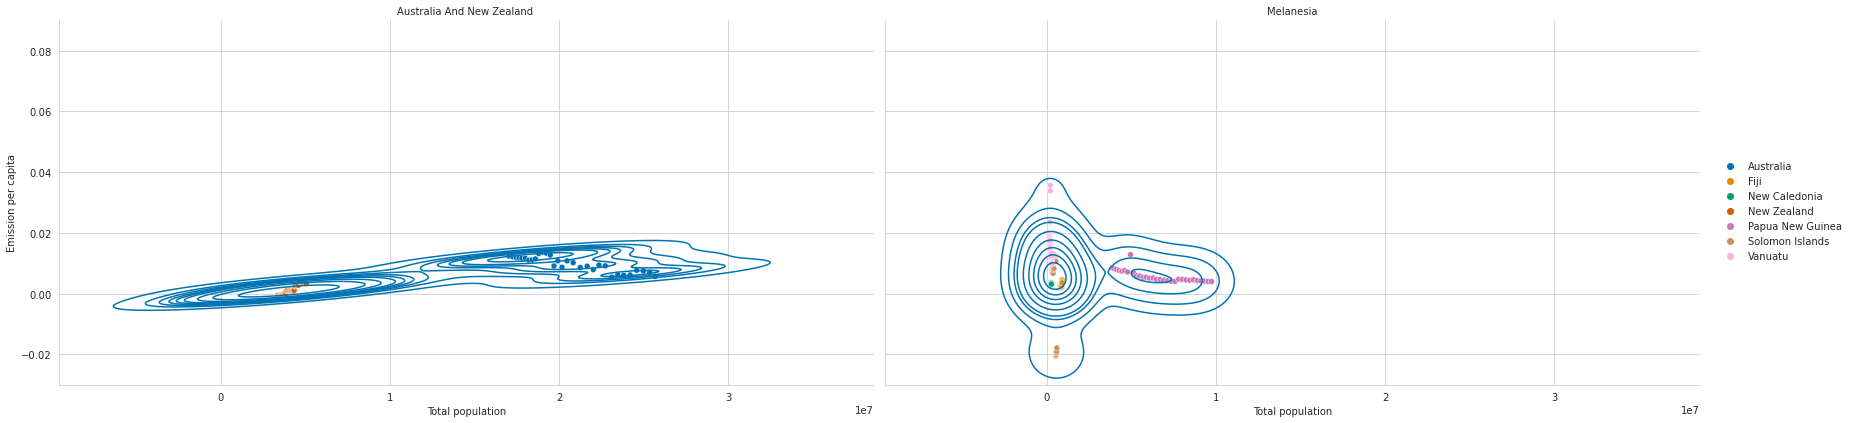

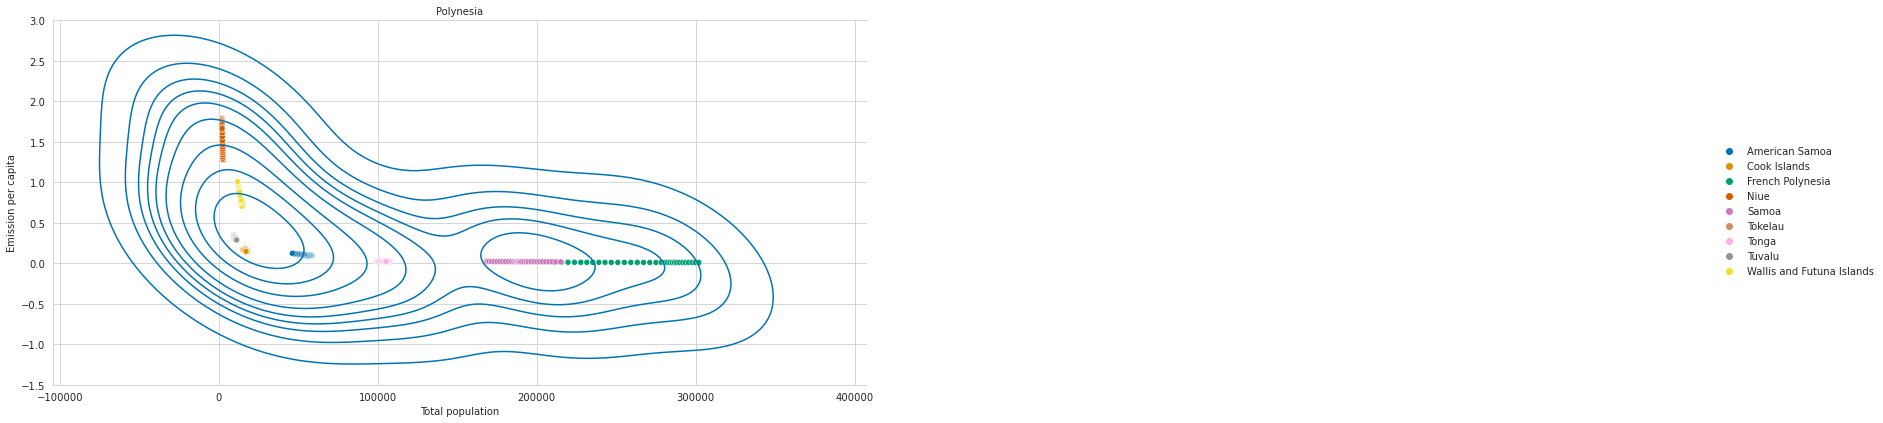

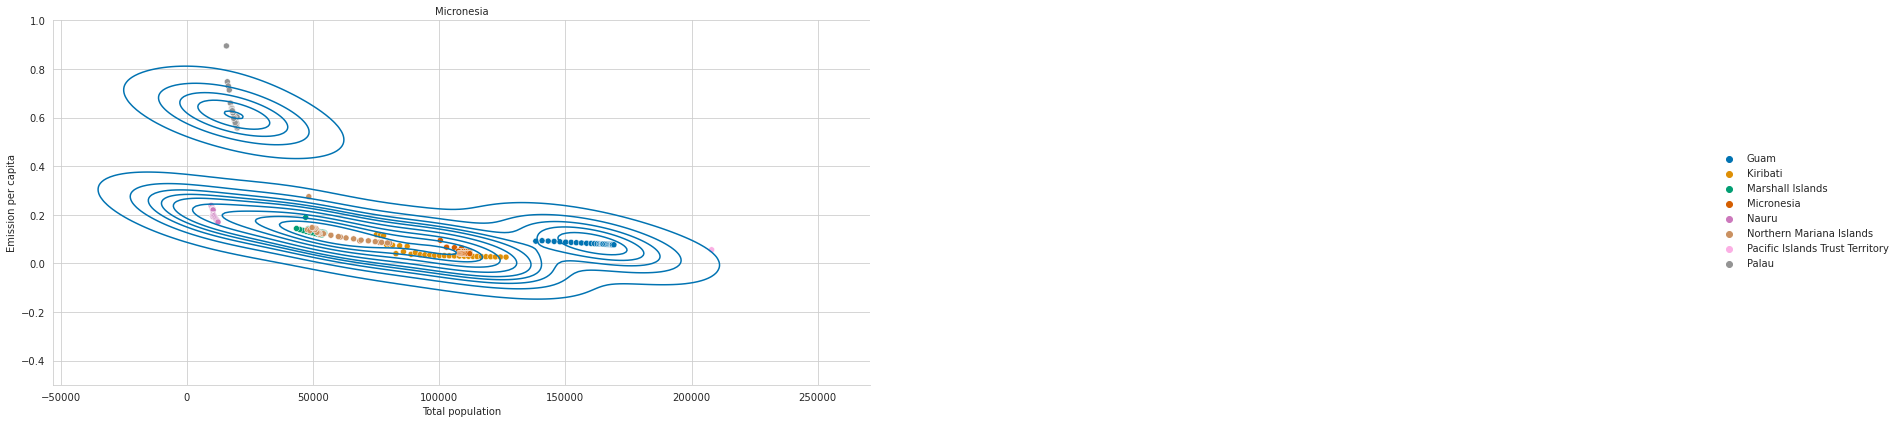

In [617]:
emissionPerCapitaByContinent(df_oceaniaEmiPerCap, (-0.03, 0.09))
emissionPerCapitaByContinent(df_poliEmiPerCap, (-1.5, 3))
emissionPerCapitaByContinent(df_microEmiPerCap, (-0.5, 1))

In [618]:
correlation = df.groupby('Year').agg({'total_emission':'sum','Average_Temperature_C':'mean','total_population':'sum', 'Forestland':'sum', 'Emission_Per_Capita':'mean'})
correlation.corr()

total_emission  Average_Temperature_C  \
total_emission               1.000000               0.900586   
Average_Temperature_C        0.900586               1.000000   
total_population             0.968997               0.912830   
Forestland                   0.333133               0.358176   
Emission_Per_Capita          0.627331               0.507236   

                       total_population  Forestland  Emission_Per_Capita  
total_emission                 0.968997    0.333133             0.627331  
Average_Temperature_C          0.912830    0.358176             0.507236  
total_population               1.000000    0.231402             0.540068  
Forestland                     0.231402    1.000000             0.294175  
Emission_Per_Capita            0.540068    0.294175             1.000000

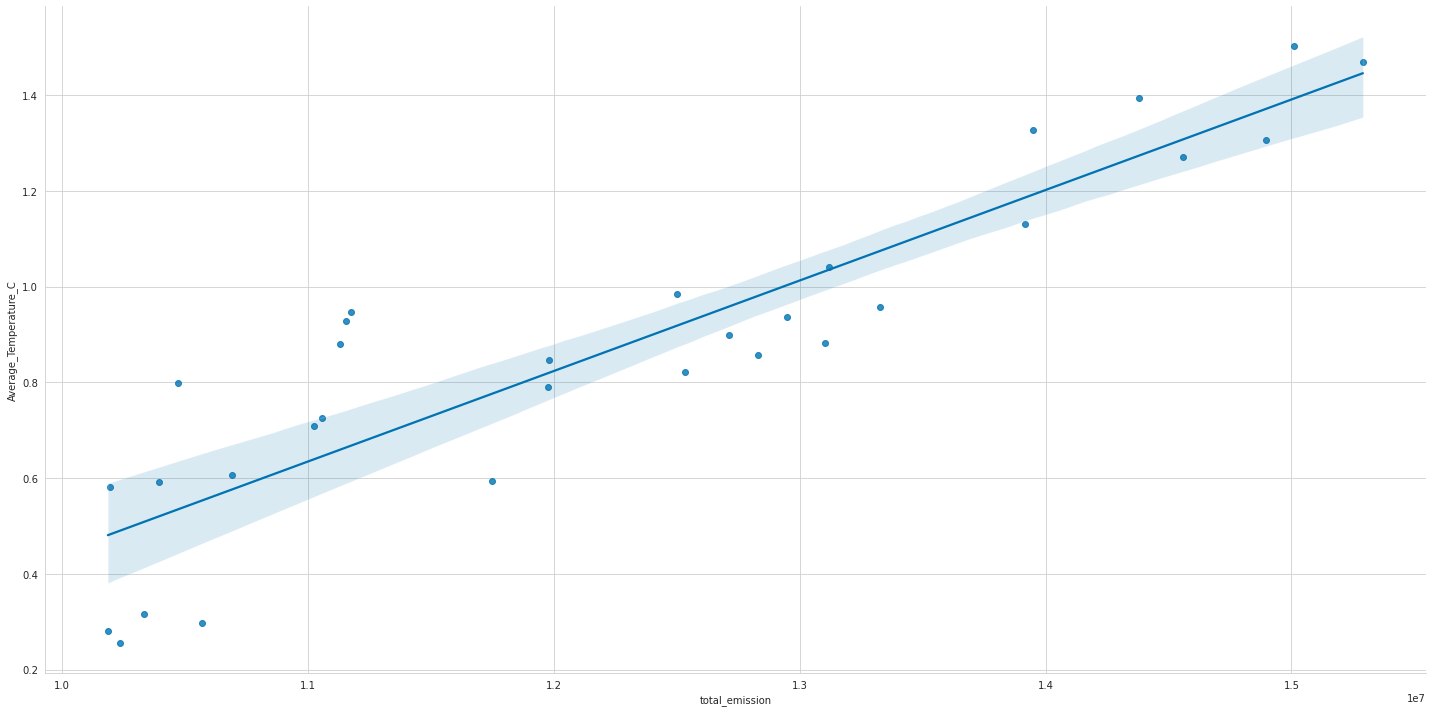

In [619]:
correlation['Year'] = correlation.index
sns.lmplot(data = correlation,
            x = 'total_emission',
            y = 'Average_Temperature_C',
            height = 10,
            aspect = 2,
            fit_reg = True)

plt.show()


## Predictions for CO2 emission